In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
from numpy import nan as NA
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.mlab as mlab
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import nan as NA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas_datareader.data as web
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from scipy import stats, integrate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from collections import Counter

In [33]:
type1=pd.read_excel("proj-data.xlsx",sheetname=0)
type1.head()

,Type,User,Machine,Date,LoginTime,LogoutTime,AvgUserProcess,MaxUserProcess,TotalKeyboadCharacters,CPUUse
0,1,U01,M01,90108,80010,170040,22,70,12345,12098
1,1,U03,M03,90108,82010,172040,22,70,12345,12098
2,1,U05,M05,90108,82310,171040,22,70,12345,12098
3,1,U07,M07,90108,80010,170040,22,70,12345,12098
4,1,U09,M09,90108,81040,170040,22,70,12345,12098


In [34]:
type2=pd.read_excel("proj-data.xlsx",sheetname=1)
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0


In [35]:
type3=pd.read_excel("proj-data.xlsx",sheetname=2)
type3.head()

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments
0,3,U01,M01,90108,120656,E1,jones@pqr.com,S,209003,1
1,3,U02,M02,90108,120656,E1,jones@pqr.com,S,209003,1
2,3,U03,M03,90108,120656,E1,jones@pqr.com,S,209003,1
3,3,U05,M05,90108,120656,E1,jones@pqr.com,S,209003,1
4,3,U07,M07,90108,120656,E1,smith@abc.org,S,209003,1


In [36]:
type1.isnull().any()

Type                      False
User                      False
Machine                   False
Date                      False
LoginTime                 False
LogoutTime                False
AvgUserProcess            False
MaxUserProcess            False
TotalKeyboadCharacters    False
CPUUse                    False
dtype: bool

In [37]:
type2.isnull().any()

Type             False
User             False
Machine          False
Date             False
StartTime        False
Program          False
ExecutionTime    False
File             False
Status           False
Printer           True
PagesPrinted      True
dtype: bool

In [38]:
print("shape",np.shape(type2))

shape (385, 11)


In [39]:
type2=type2.dropna()


In [40]:
print("shape",np.shape(type2))

shape (359, 11)


In [41]:
type2.isnull().any()

Type             False
User             False
Machine          False
Date             False
StartTime        False
Program          False
ExecutionTime    False
File             False
Status           False
Printer          False
PagesPrinted     False
dtype: bool

In [42]:
type3.isnull().any()

Type            False
User            False
Machine         False
Date            False
StartTime       False
EmailProgram    False
EmailAddress    False
Status          False
Bytes           False
Attachments     False
dtype: bool

Type 1 Analysis

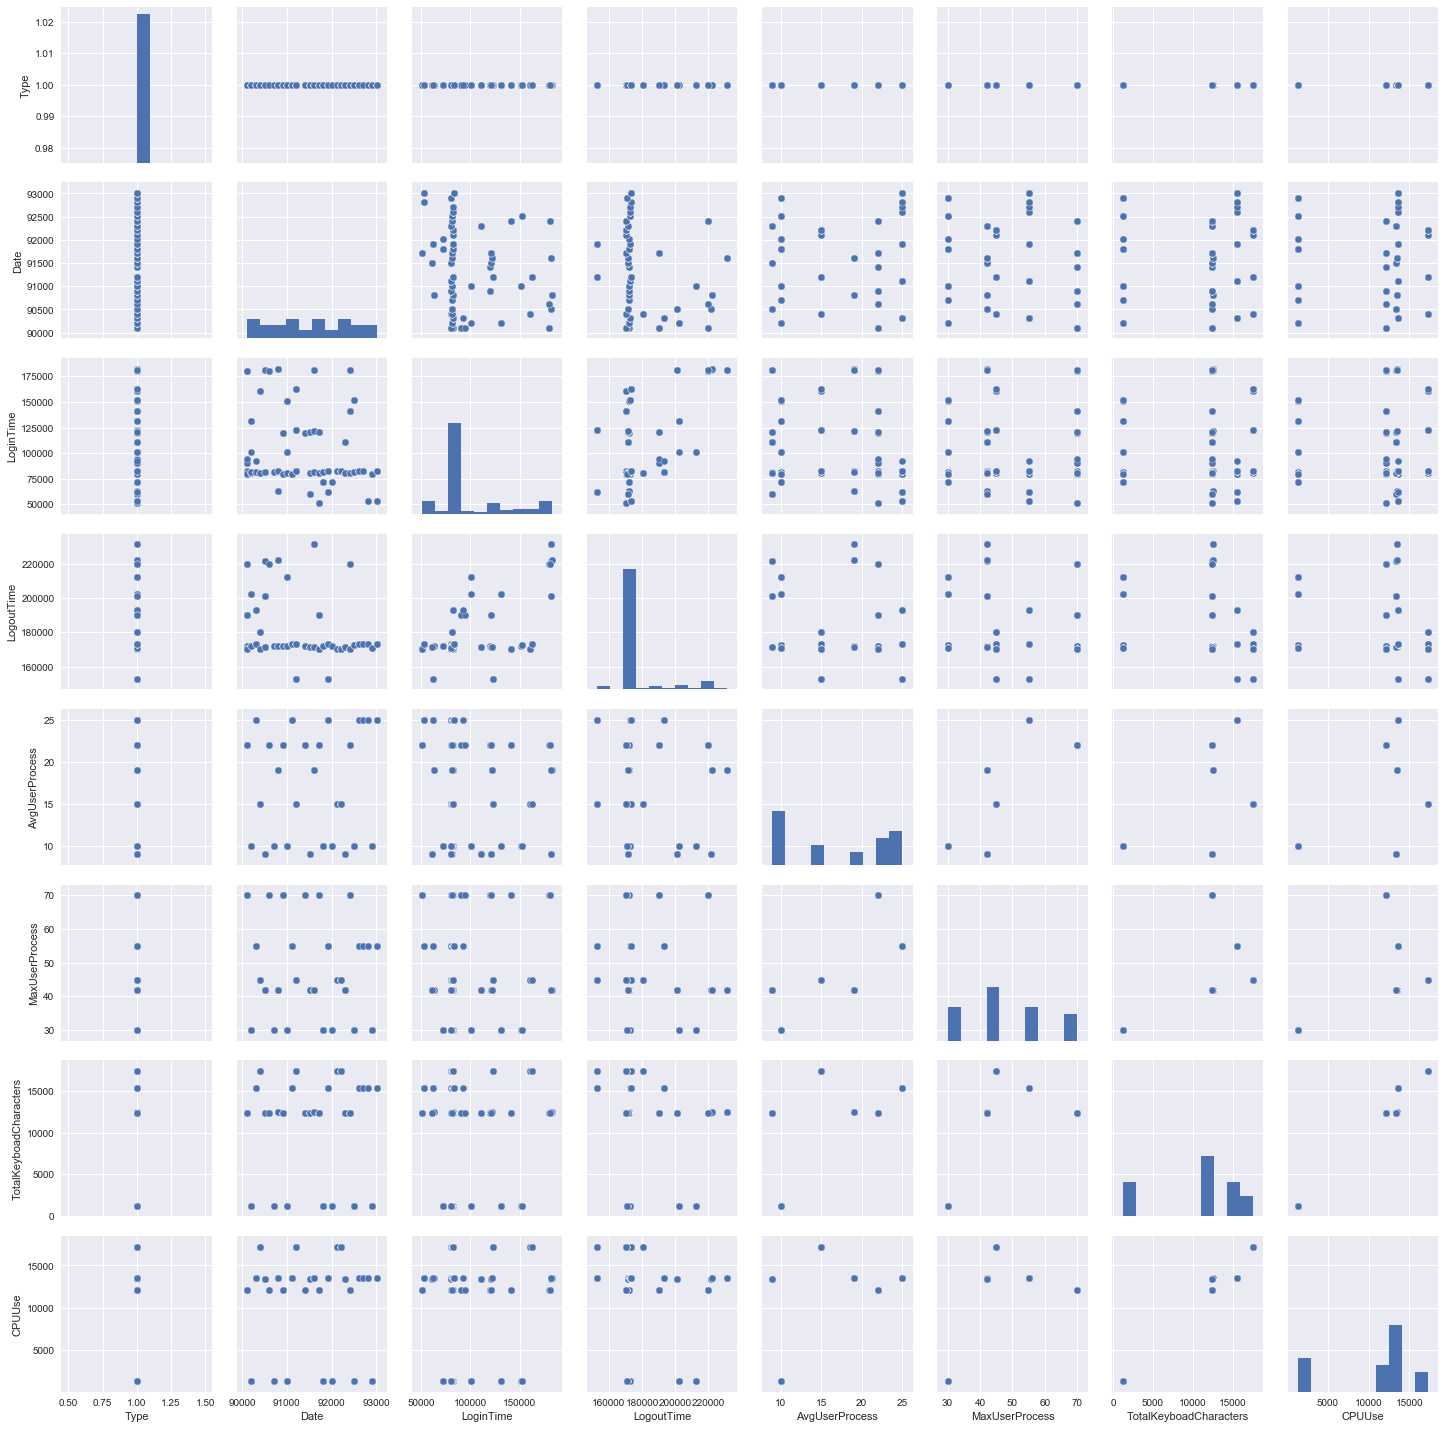

In [43]:
sns.pairplot(type1)

In [44]:
type1['UserNum']=type1.User.str[1: ]

In [45]:
type1.head()

,Type,User,Machine,Date,LoginTime,LogoutTime,AvgUserProcess,MaxUserProcess,TotalKeyboadCharacters,CPUUse,UserNum
0,1,U01,M01,90108,80010,170040,22,70,12345,12098,01
1,1,U03,M03,90108,82010,172040,22,70,12345,12098,03
2,1,U05,M05,90108,82310,171040,22,70,12345,12098,05
3,1,U07,M07,90108,80010,170040,22,70,12345,12098,07
4,1,U09,M09,90108,81040,170040,22,70,12345,12098,09


In [46]:
type1['MachineNum']=type1.Machine.str[1: ]

In [47]:
type1.head()

,Type,User,Machine,Date,LoginTime,LogoutTime,AvgUserProcess,MaxUserProcess,TotalKeyboadCharacters,CPUUse,UserNum,MachineNum
0,1,U01,M01,90108,80010,170040,22,70,12345,12098,01,01
1,1,U03,M03,90108,82010,172040,22,70,12345,12098,03,03
2,1,U05,M05,90108,82310,171040,22,70,12345,12098,05,05
3,1,U07,M07,90108,80010,170040,22,70,12345,12098,07,07
4,1,U09,M09,90108,81040,170040,22,70,12345,12098,09,09


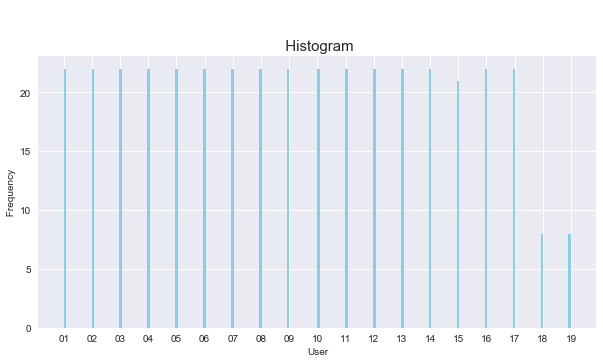

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (10, 5))
ax.hist(type1.UserNum, bins = 200, range = [min(type1.UserNum), max(type1.UserNum)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("User", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

In [49]:
type1.UserNum.describe()

count     389
unique     19
top        05
freq       22
Name: UserNum, dtype: object

# Login Access pattern

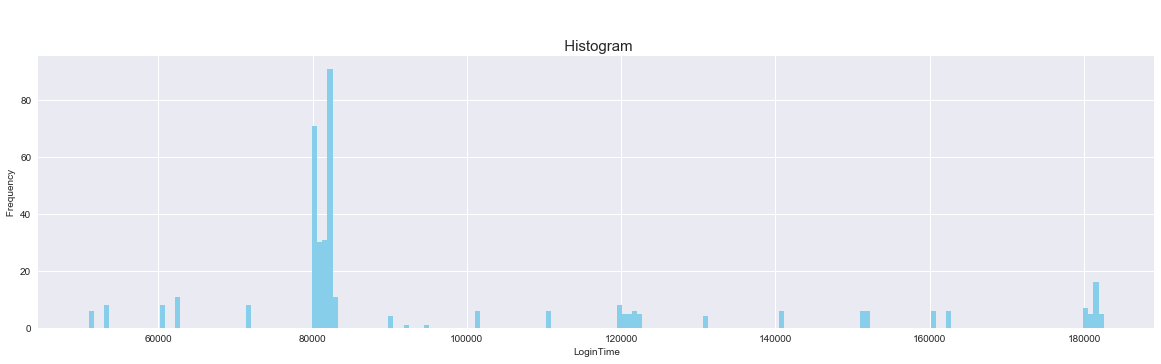

In [215]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type1.LoginTime, bins = 200, range = [min(type1.LoginTime), max(type1.LoginTime)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("LoginTime", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

Unique Login Times : 39


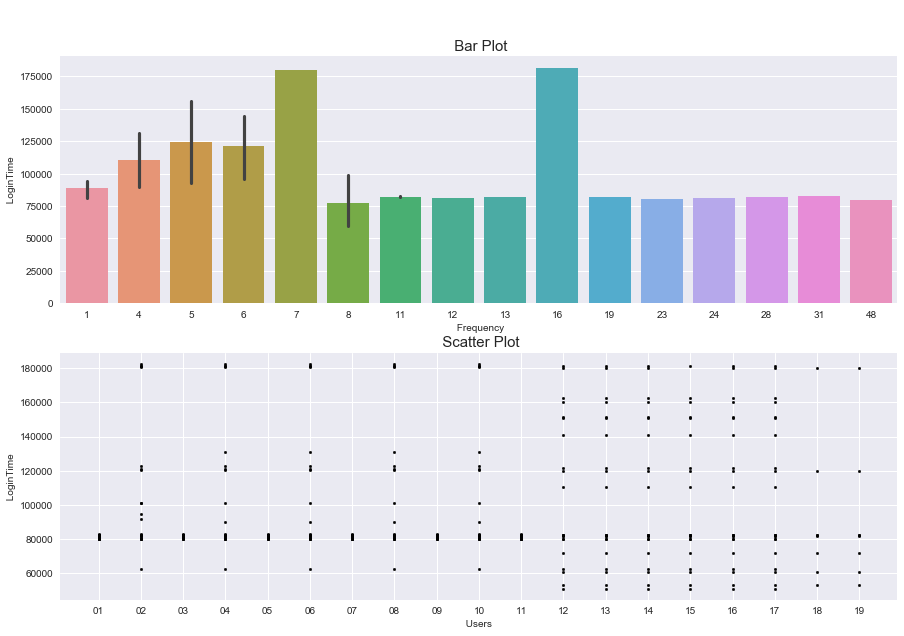

In [51]:
logintime = type1["LoginTime"].value_counts()
print("Unique Login Times :", logintime.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(logintime.values, logintime.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['UserNum'].values
f2 = type1['LoginTime'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" LoginTime ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" LoginTime ", fontsize = 10)
plt.show()

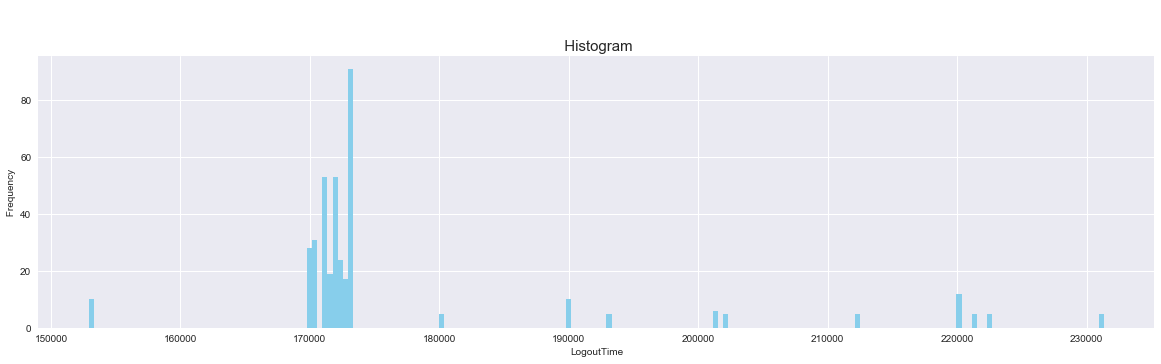

In [216]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type1.LogoutTime, bins = 200, range = [min(type1.LogoutTime), max(type1.LogoutTime)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("LogoutTime", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

Unique Logout Times : 23


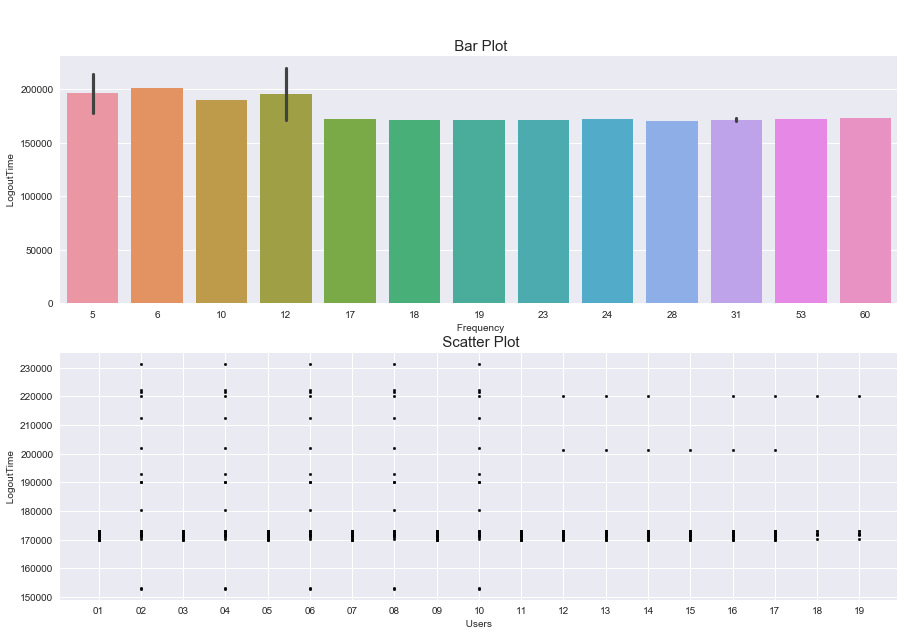

In [52]:
logouttime = type1["LogoutTime"].value_counts()
print("Unique Logout Times :", logouttime.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(logouttime.values, logouttime.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['UserNum'].values
f2 = type1['LogoutTime'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" LogoutTime ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" LogoutTime ", fontsize = 10)
plt.show()

In [220]:
dates = type1["Date"].value_counts()
dat=type1["Date"]
print("Unique Date Names :", dates.size)
dates


Unique Date Names : 29


91508    19
93008    17
90208    17
90808    17
90308    17
92908    17
92408    17
91908    17
91208    17
90908    17
90408    17
92508    17
92308    17
91708    17
91008    17
90508    17
92608    17
92208    17
91608    17
91108    17
91808    17
90108    16
90708     2
91408     2
92808     2
90608     2
92008     2
92108     2
92708     2
Name: Date, dtype: int64

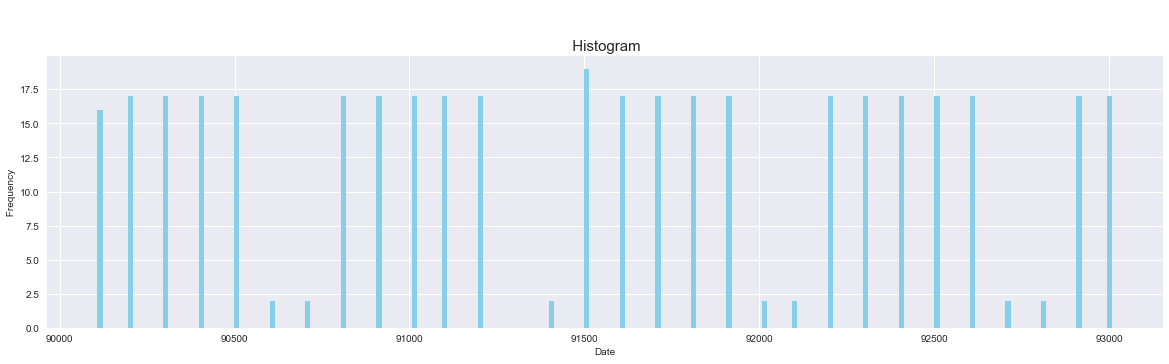

In [217]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type1.Date, bins = 200, range = [min(type1.Date), max(type1.Date)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("Date", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

In [218]:
## needs to u[date date]

Unique Brand Names : 29


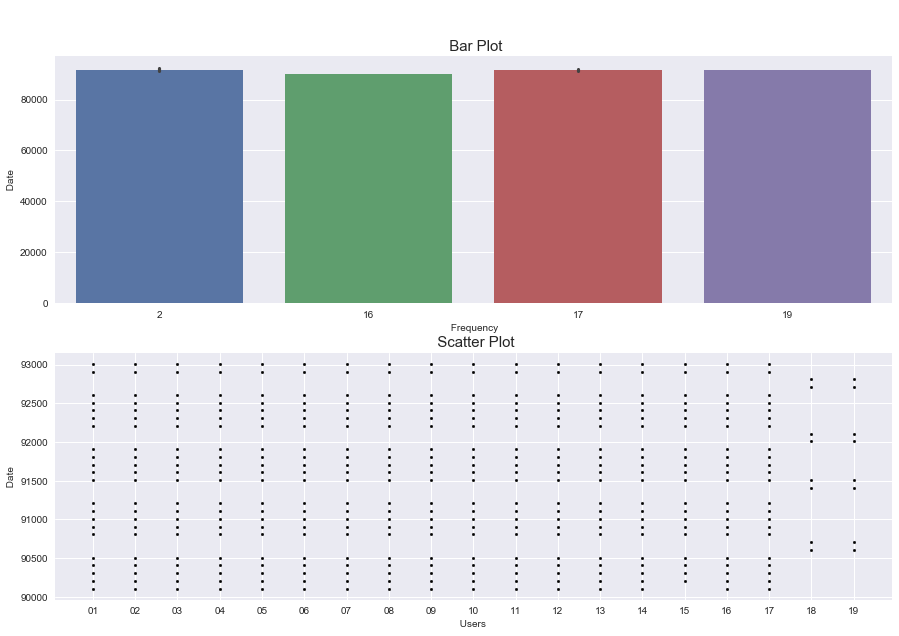

In [165]:
dates = type1["Date"].value_counts()
print("Unique Brand Names :", dates.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(dates[:].values, dates[:].index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['UserNum'].values
f2 = type1['Date'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Date ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Date ", fontsize = 10)
plt.show()

Unique Keyboard Characters : 5


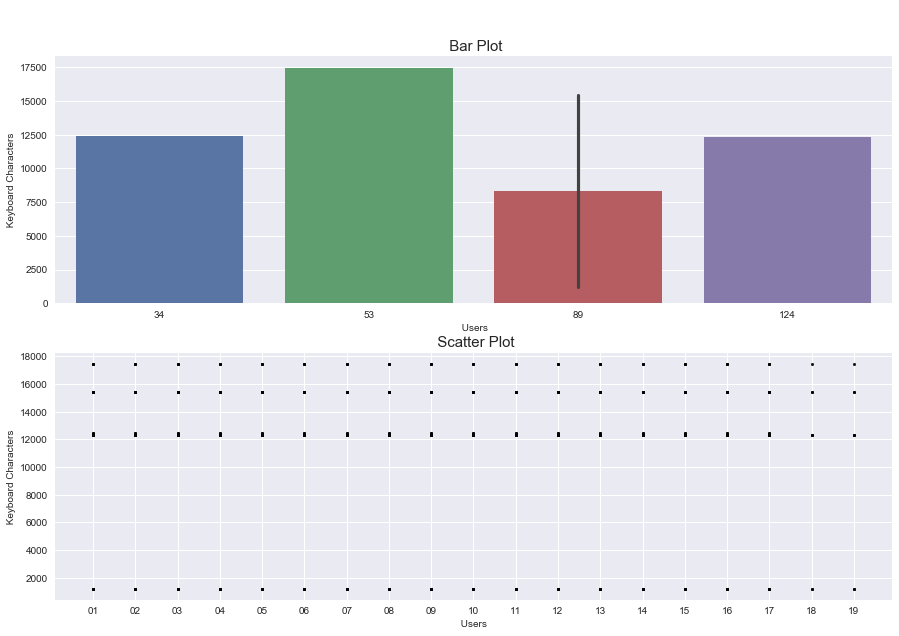

In [55]:
KeyboardChar = type1["TotalKeyboadCharacters"].value_counts()
print("Unique Keyboard Characters :", KeyboardChar.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(KeyboardChar[:].values, KeyboardChar[:].index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['UserNum'].values
f2 = type1['TotalKeyboadCharacters'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Users", fontsize = 10)
ax[0].set_ylabel(" Keyboard Characters ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Keyboard Characters ", fontsize = 10)
plt.show()

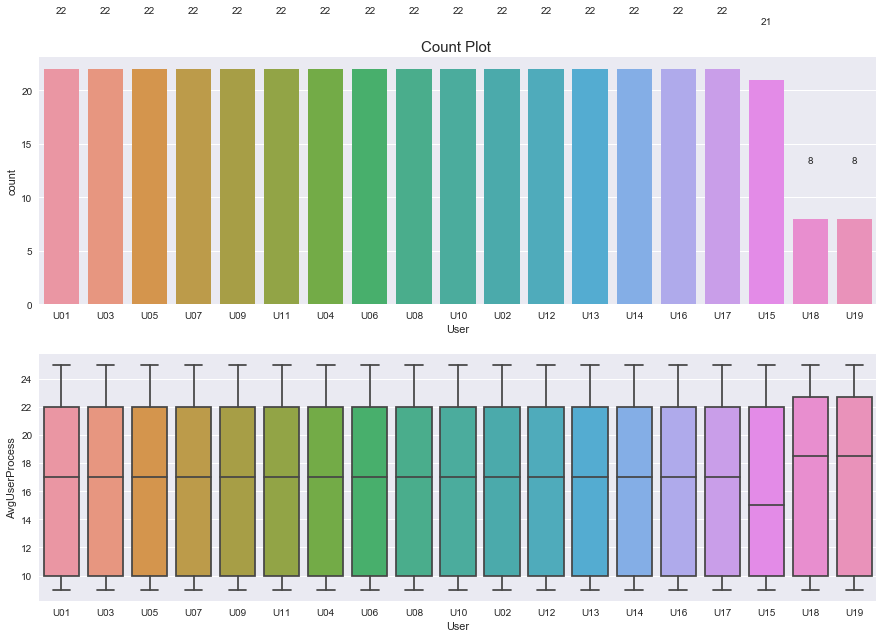

In [56]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type1.User, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type1.User.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type1.User, y = type1.AvgUserProcess,showfliers = False, orient = "v", ax = ax[1])
plt.show()

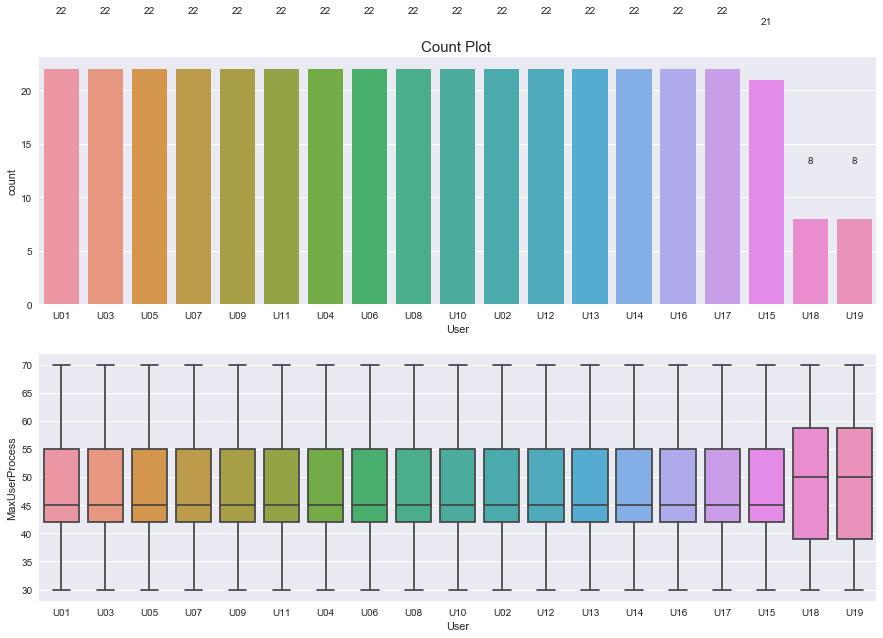

In [57]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type1.User, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type1.User.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type1.User, y = type1.MaxUserProcess,showfliers = False, orient = "v", ax = ax[1])
plt.show()

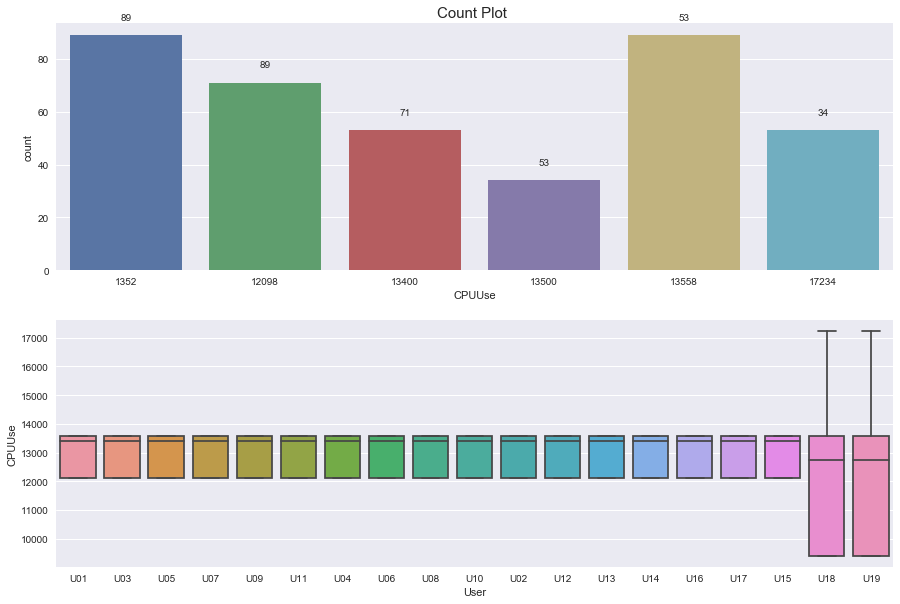

In [58]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type1.CPUUse, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type1.CPUUse.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type1.User, y = type1.CPUUse,showfliers = False, orient = "v", ax = ax[1])
plt.show()

Text(0.5,0.98,' Correlations Heat Map for attributes')

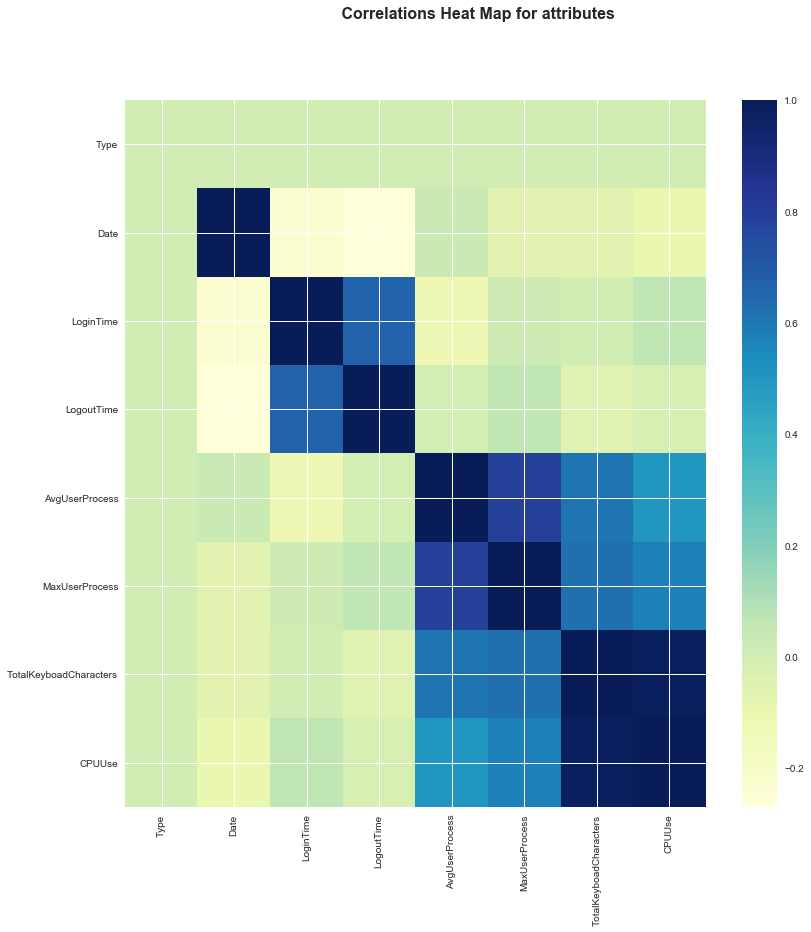

In [59]:
corltn=type1.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(13, 13))
plt.imshow(corltn, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

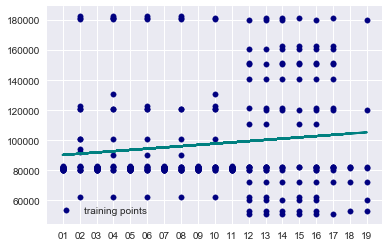

In [60]:
X_train, x_test, Y_train, y_test = train_test_split(
type1['UserNum'], type1['LoginTime'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

In [173]:
r_data= type1[['UserNum','MachineNum','LogoutTime']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type1['LoginTime'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)


537312977.8278986

In [62]:
r_data= type1[['Date','LoginTime','LogoutTime']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type1['UserNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

28.317679623303793

In [180]:
r_data= type1[['Date','LoginTime','LogoutTime','MachineNum','AvgUserProcess','MaxUserProcess']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type1['UserNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

9.828154185399343

# Program Access pattern

In [63]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0


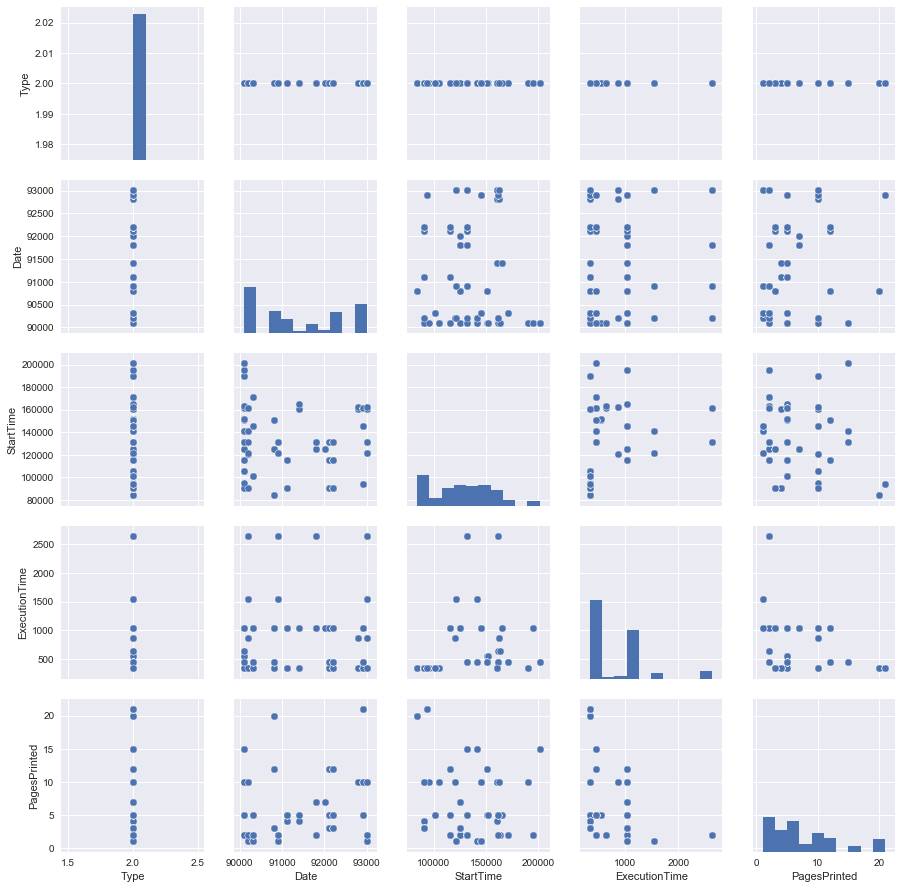

In [64]:
sns.pairplot(type2)

In [65]:
type2['UserNum']=type2.User.str[1: ]

In [66]:
type2['MachineNum']=type2.Machine.str[1: ]

In [67]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09


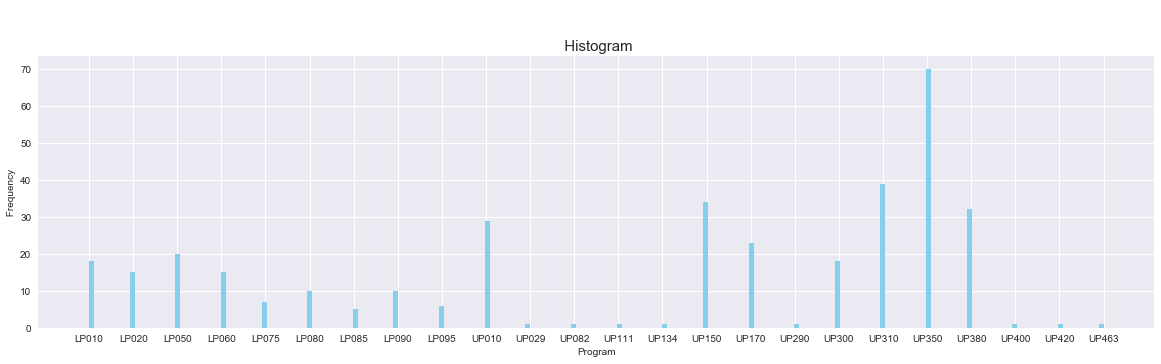

In [181]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type2.Program, bins = 200, range = [min(type2.Program), max(type2.Program)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("Program", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

Unique Program Names : 24


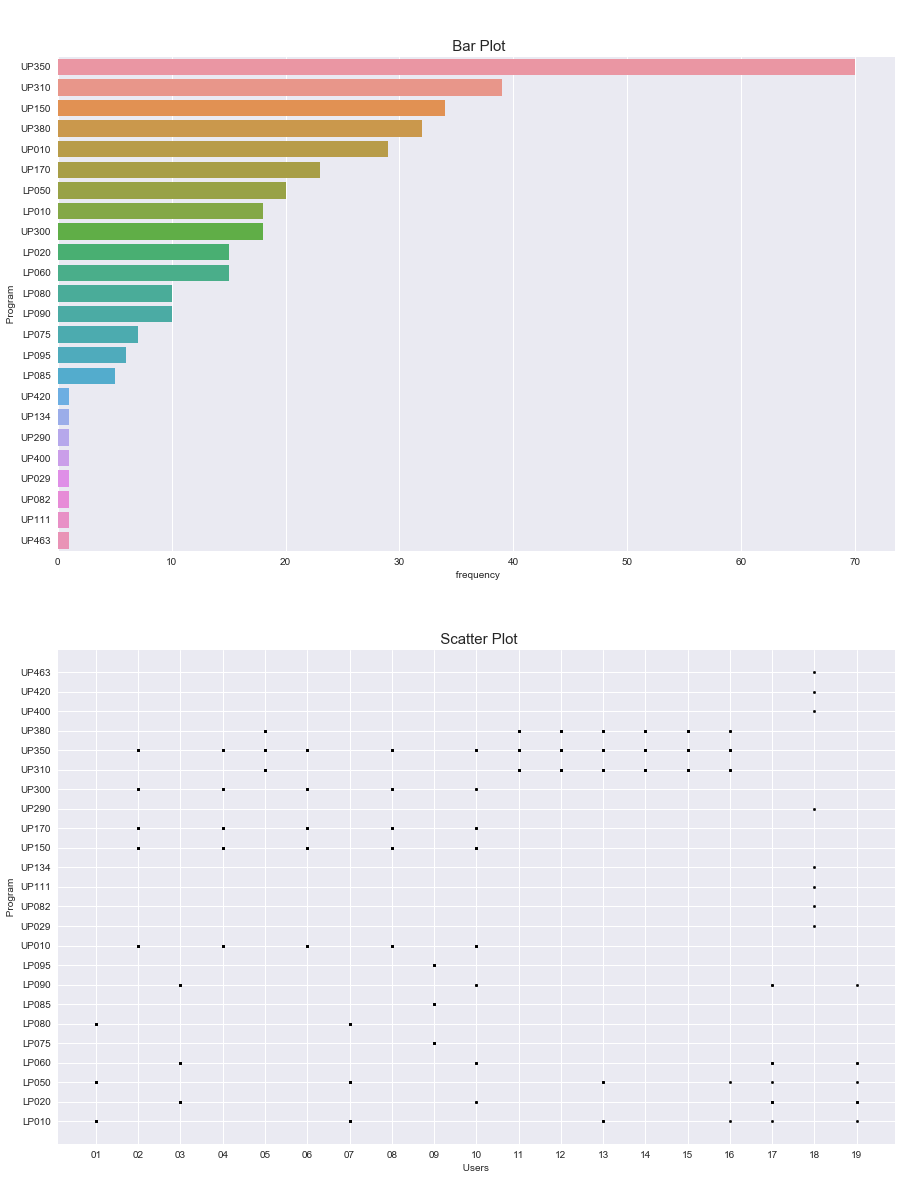

In [293]:
program = type2["Program"].value_counts()
print("Unique Program Names :", program.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 20))
sns.barplot(program.values, program.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" program ", fontsize = 10)
f1 = type2['UserNum'].values
f2 = type2['Program'].values
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" Program ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Program ", fontsize = 10)
plt.show()

Unique User Names : 28


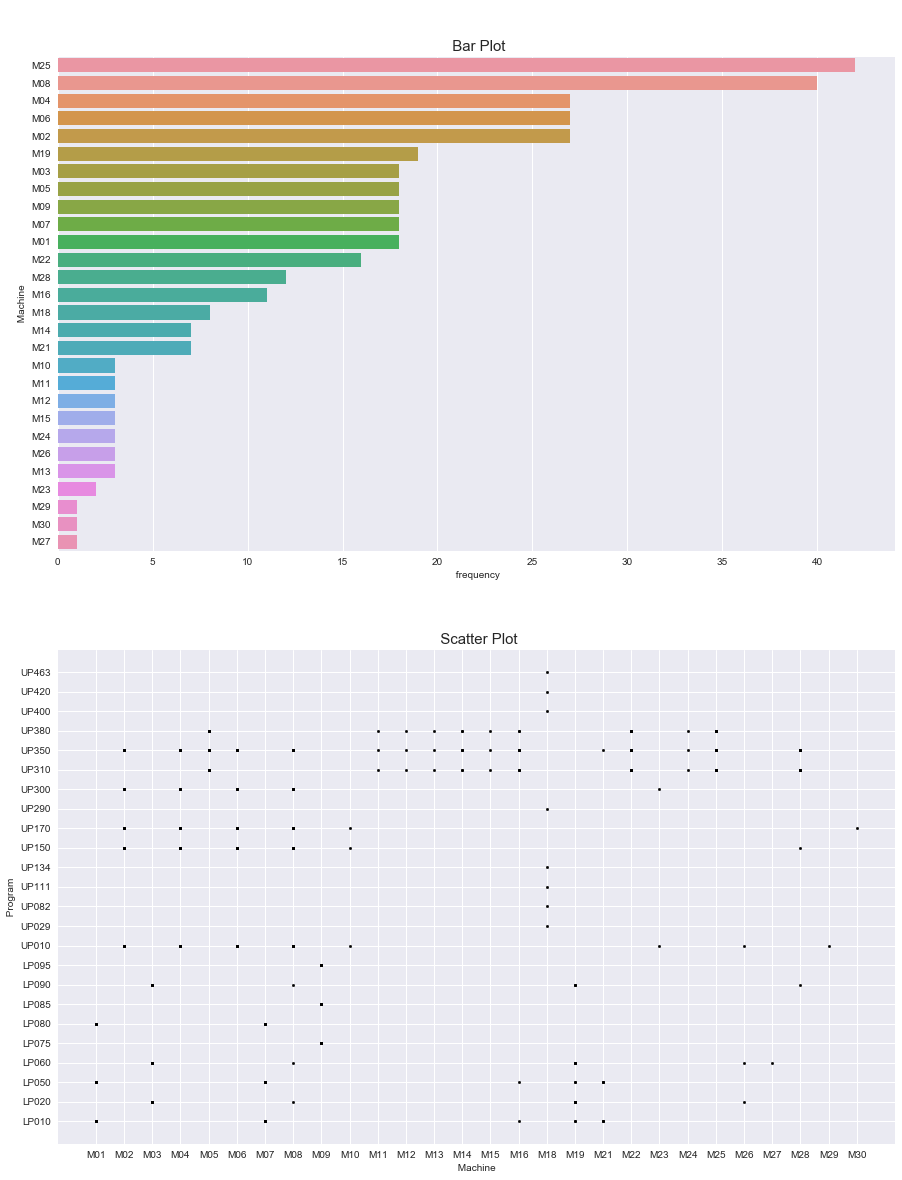

In [294]:
machine2 = type2["Machine"].value_counts()
print("Unique User Names :", machine2.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 20))
sns.barplot(machine2.values, machine2.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" User ", fontsize = 10)
f1 = type2['Machine'].values
f2 = type2['Program'].values
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" Machine ", fontsize = 10)
ax[1].set_xlabel(" Machine ", fontsize = 10)
ax[1].set_ylabel(" Program ", fontsize = 10)
plt.show()

Unique User Names : 28


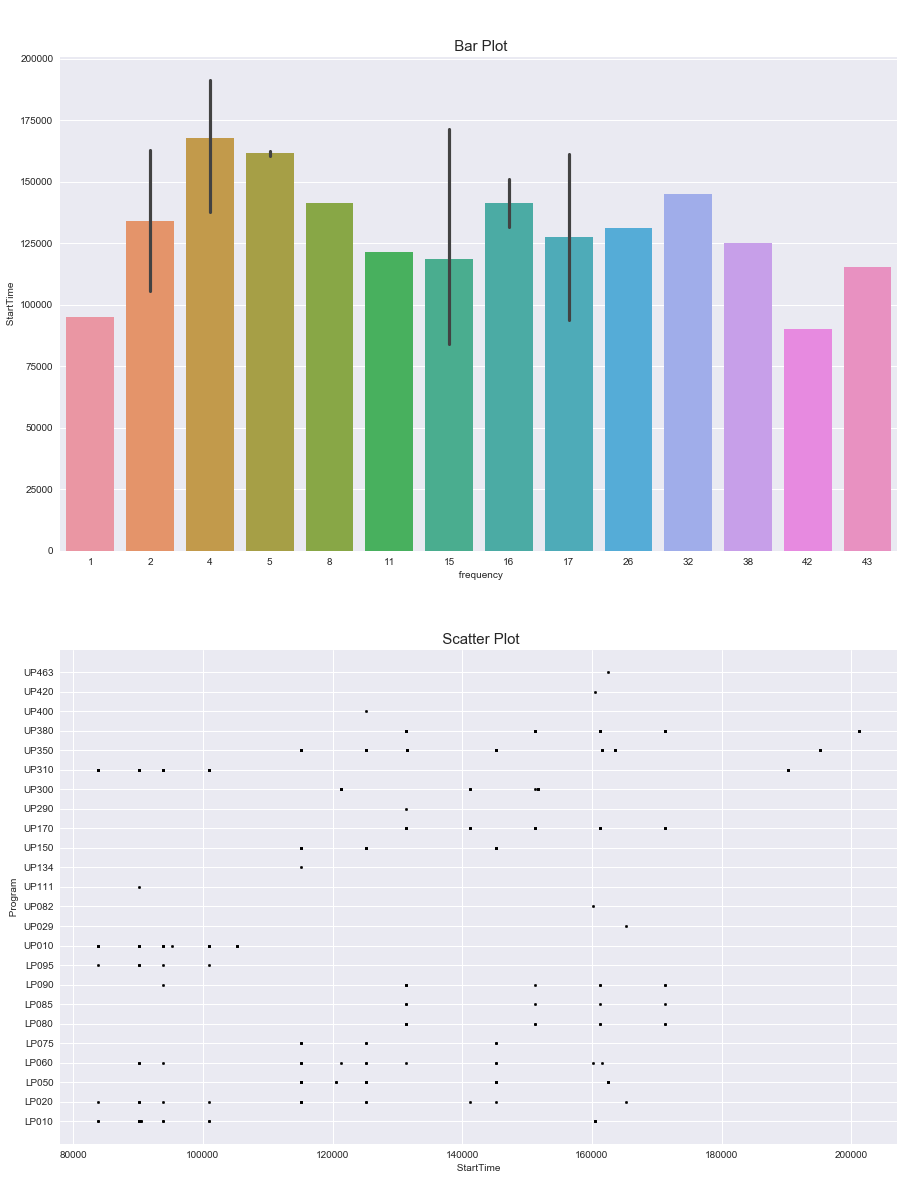

In [295]:
starttime2 = type2["StartTime"].value_counts()
print("Unique User Names :", starttime2.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 20))
sns.barplot(starttime2.values, starttime2.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" User ", fontsize = 10)
f1 = type2['StartTime'].values
f2 = type2['Program'].values
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" StartTime ", fontsize = 10)
ax[1].set_xlabel(" StartTime ", fontsize = 10)
ax[1].set_ylabel(" Program ", fontsize = 10)
plt.show()

Unique execution times : 8


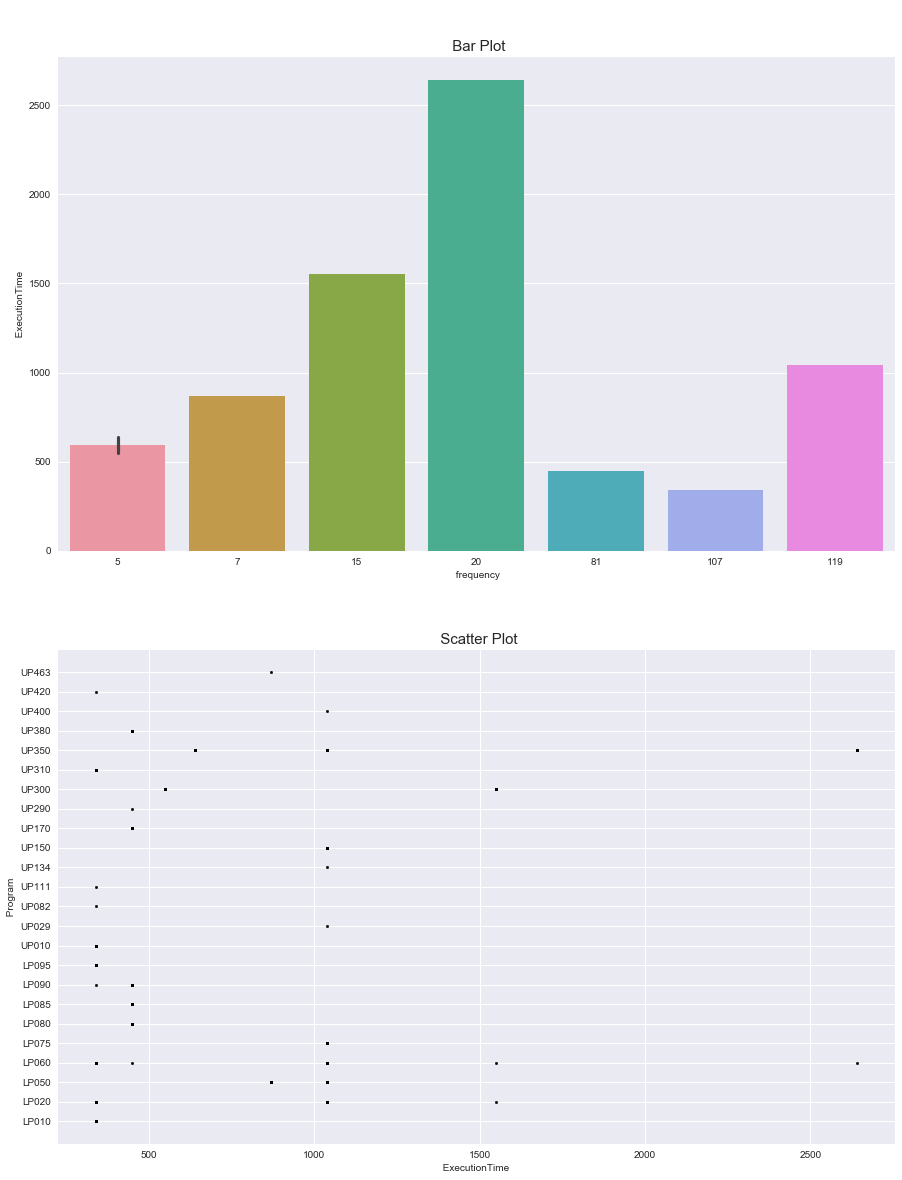

In [296]:
executiontime2 = type2["ExecutionTime"].value_counts()
print("Unique execution times :", executiontime2.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 20))
sns.barplot(executiontime2.values, executiontime2.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" User ", fontsize = 10)
f1 = type2['ExecutionTime'].values
f2 = type2['Program'].values
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" ExecutionTime ", fontsize = 10)
ax[1].set_xlabel(" ExecutionTime ", fontsize = 10)
ax[1].set_ylabel(" Program ", fontsize = 10)
plt.show()

In [74]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09


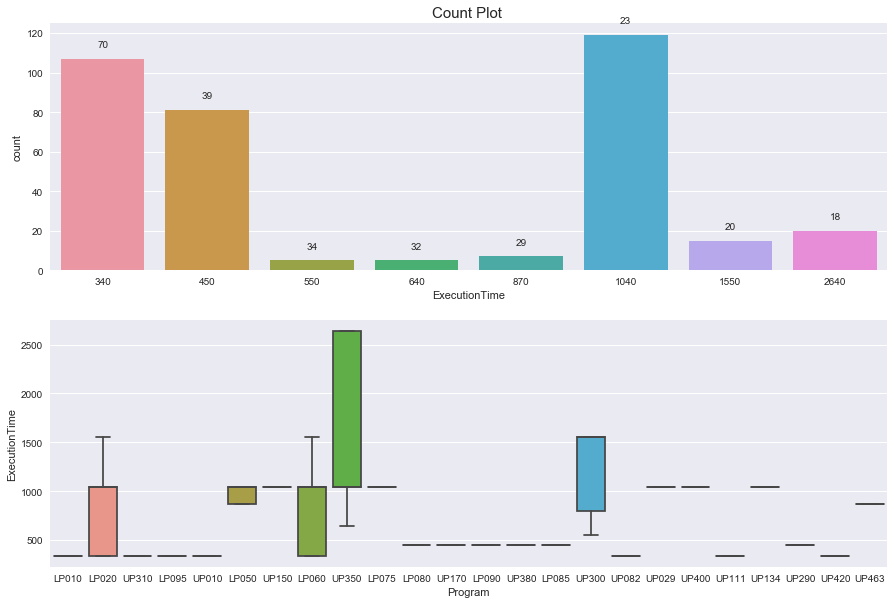

In [75]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type2.ExecutionTime, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type2.Program.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type2.Program, y = type2.ExecutionTime,showfliers = False, orient = "v", ax = ax[1])
plt.show()

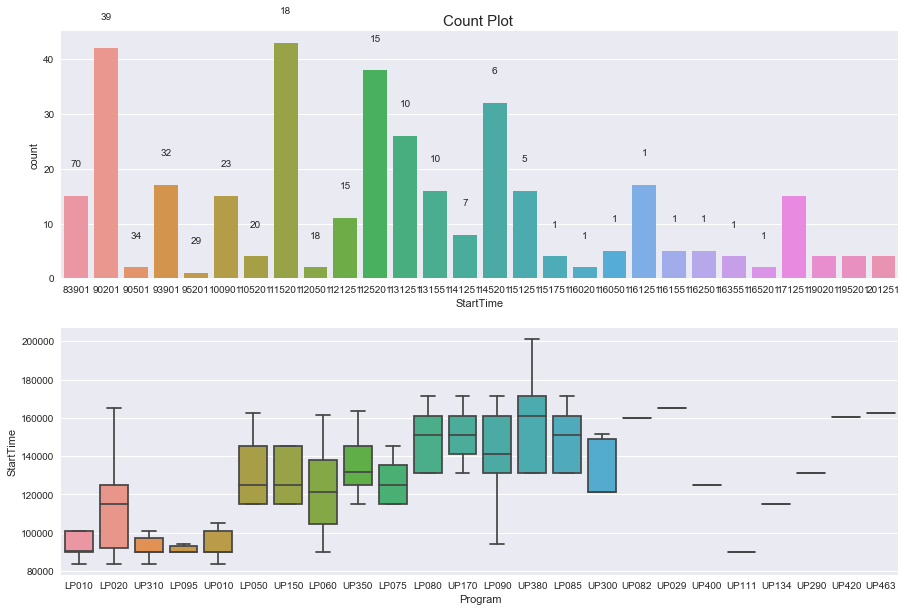

In [76]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type2.StartTime, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type2.Program.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type2.Program, y = type2.StartTime,showfliers = False, orient = "v", ax = ax[1])
plt.show()

In [77]:
type2.UserNum.head()

0    01
1    03
2    05
3    07
4    09
Name: UserNum, dtype: object

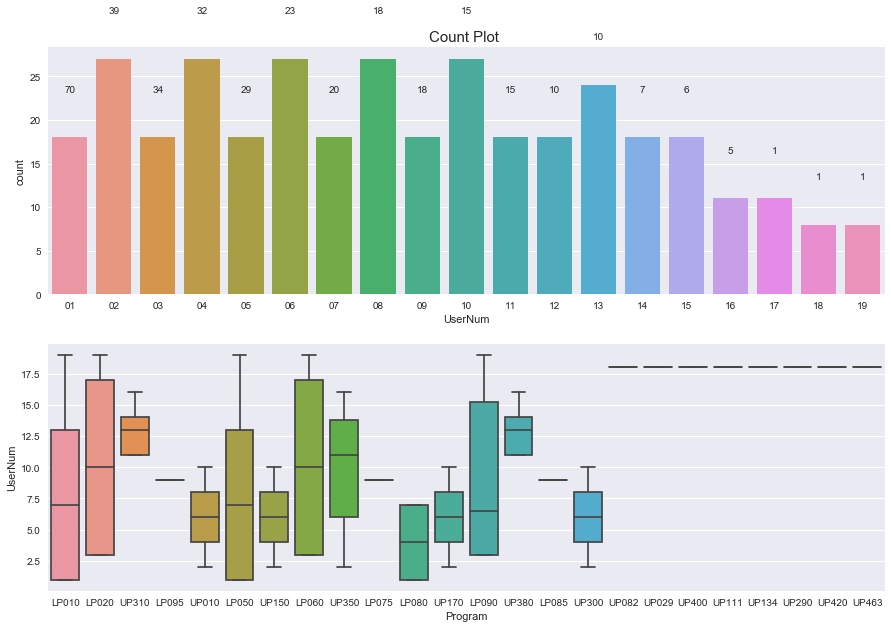

In [78]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type2.UserNum, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type2.Program.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type2.Program, y = type2.UserNum.astype(np.float),showfliers = False, orient = "v", ax = ax[1])
plt.show()

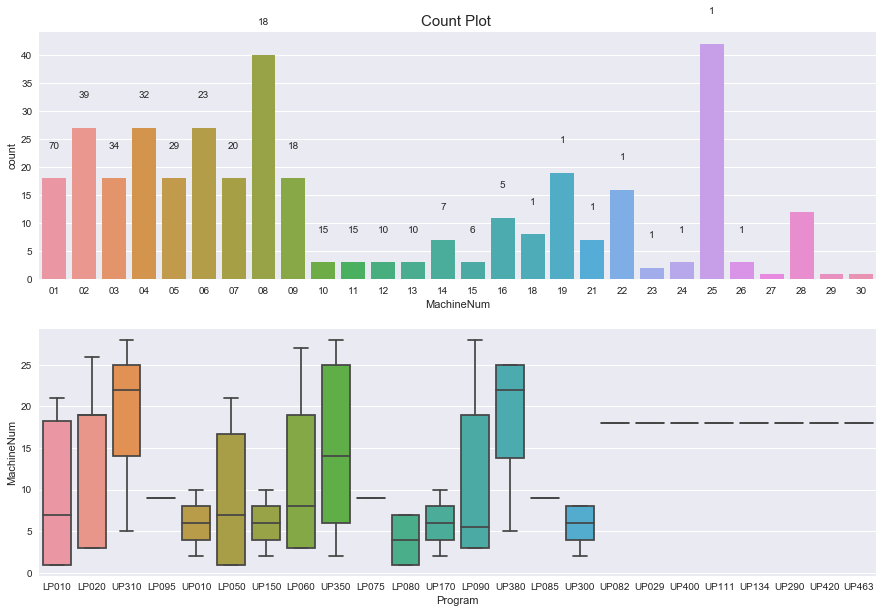

In [79]:
fig, ax = plt.subplots(2, 1, figsize = (15,10))
sns.countplot(type2.MachineNum, ax = ax[0])
rectangles = ax[0].patches
ax[0].set_title("Count Plot ", fontsize = 15)
labels = type2.Program.value_counts().values
for rect, label in zip(rectangles, labels):
    height = rect.get_height()
    ax[0].text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = "center", va = "bottom")
sns.boxplot(x = type2.Program, y = type2.MachineNum.astype(np.float),showfliers = False, orient = "v", ax = ax[1])
plt.show()

Text(0.5,0.98,' Correlations Heat Map for attributes')

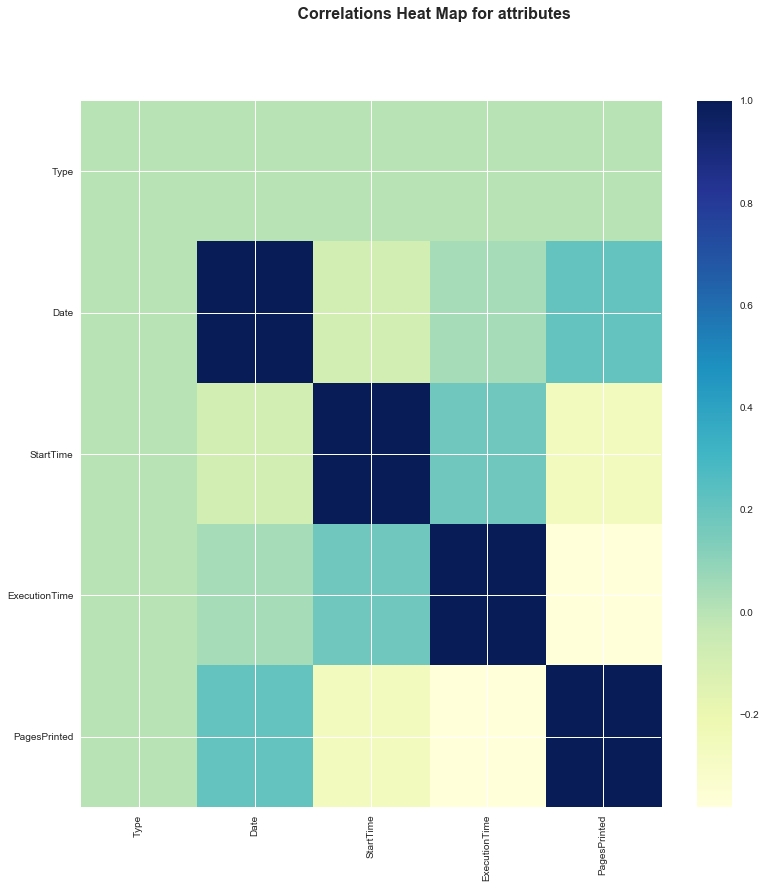

In [80]:
corltn=type2.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(13, 13))
plt.imshow(corltn, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

In [81]:
type2['ProgramNum']=type2.Program.str[2: ]

In [82]:
type2['ProgramNum'].head()

0    010
1    020
2    310
3    010
4    095
Name: ProgramNum, dtype: object

In [83]:
def toNumeric(data,to):
    if type2[data].dtype == type(object):
        le = preprocessing.LabelEncoder()
        type2[to] = le.fit_transform(type2[data].astype(str))   
toNumeric('Program','ProgramNum')
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8


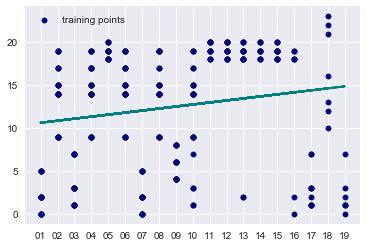

In [84]:
X_train, x_test, Y_train, y_test = train_test_split(
type2['UserNum'], type2['ProgramNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

In [85]:
r_data= type2[['UserNum','MachineNum','Date']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['ProgramNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

48.14329149829993

In [86]:
r_data= type2[['UserNum','MachineNum','Date','ExecutionTime','StartTime']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['ProgramNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

43.66481808687884

In [182]:
r_data= type2[['UserNum','MachineNum','Date','ExecutionTime','StartTime','PagesPrinted']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['ProgramNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

43.99887866802398

# File Access pattern

In [98]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8


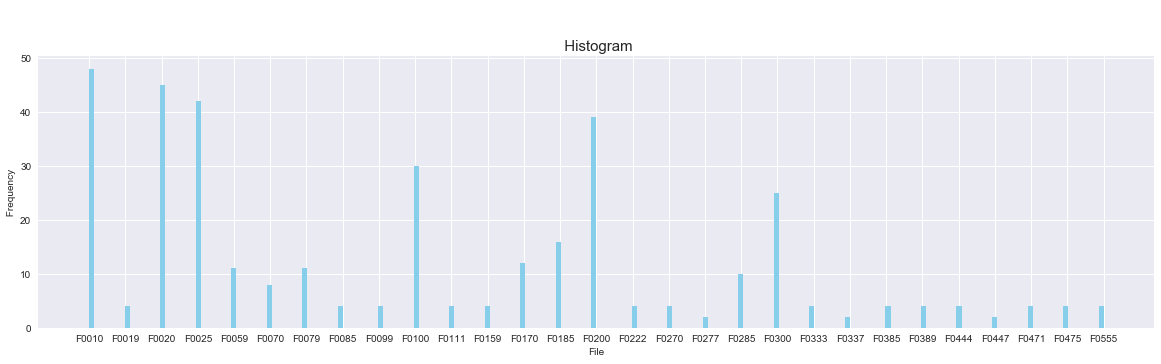

In [99]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type2.File, bins = 200, range = [min(type2.File), max(type2.File)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("File", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

Unique Files : 29


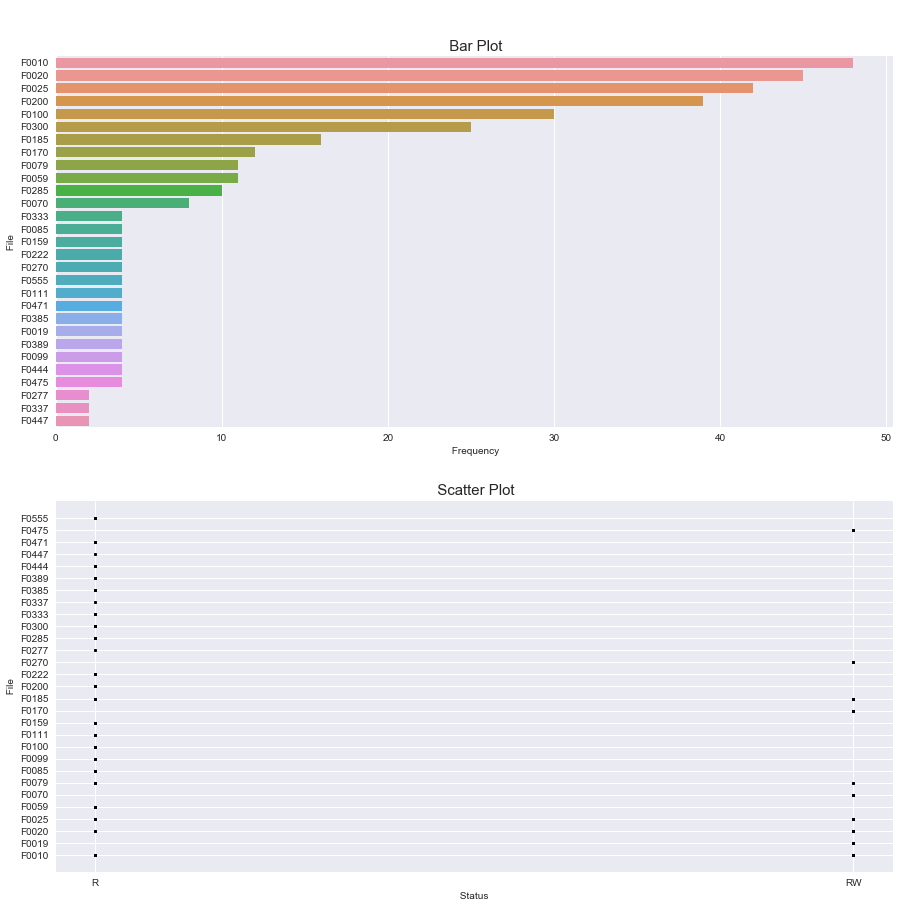

In [183]:
file = type2["File"].value_counts()
print("Unique Files :", file.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(file.values, file.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['Status'].values
f2 = type2['File'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" File ", fontsize = 10)
ax[1].set_xlabel(" Status ", fontsize = 10)
ax[1].set_ylabel(" File ", fontsize = 10)
plt.show()

Unique Files : 19


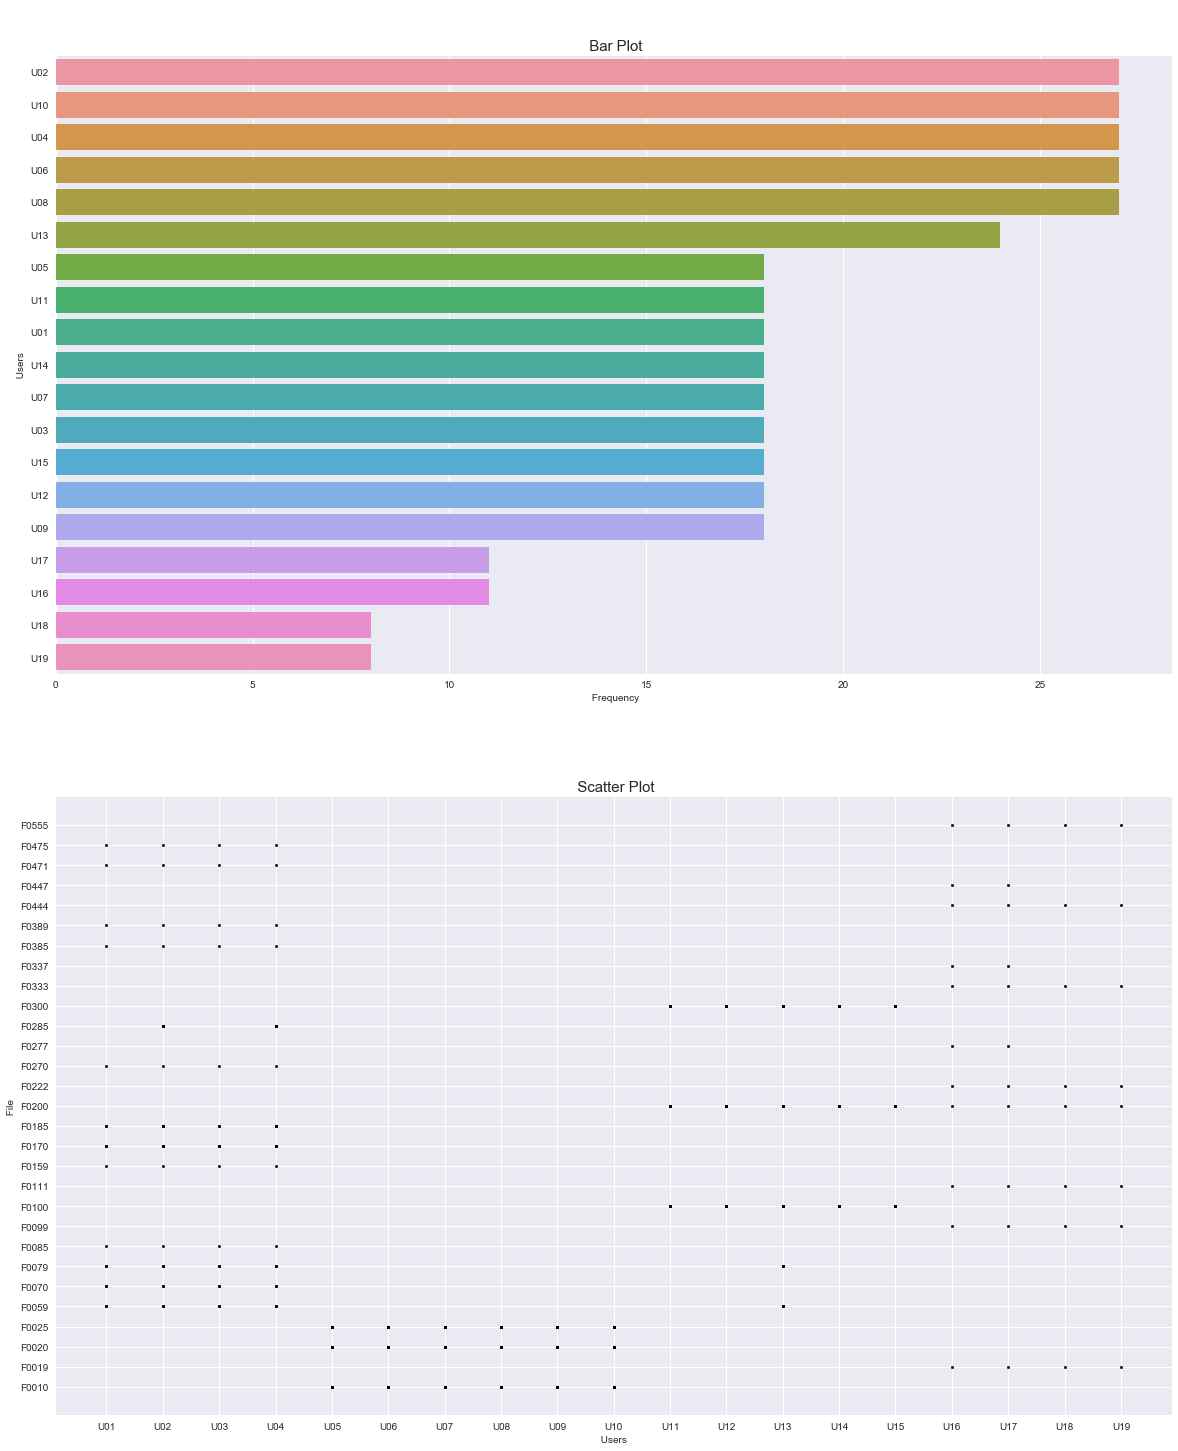

In [248]:
user = type2["User"].value_counts()
print("Unique Files :", user.size)
fig, ax = plt.subplots(2, 1, figsize = (20, 25))
sns.barplot(user.values, user.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['User'].values
f2 = type2['File'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Users ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" File ", fontsize = 10)
plt.show()

Unique Files : 28


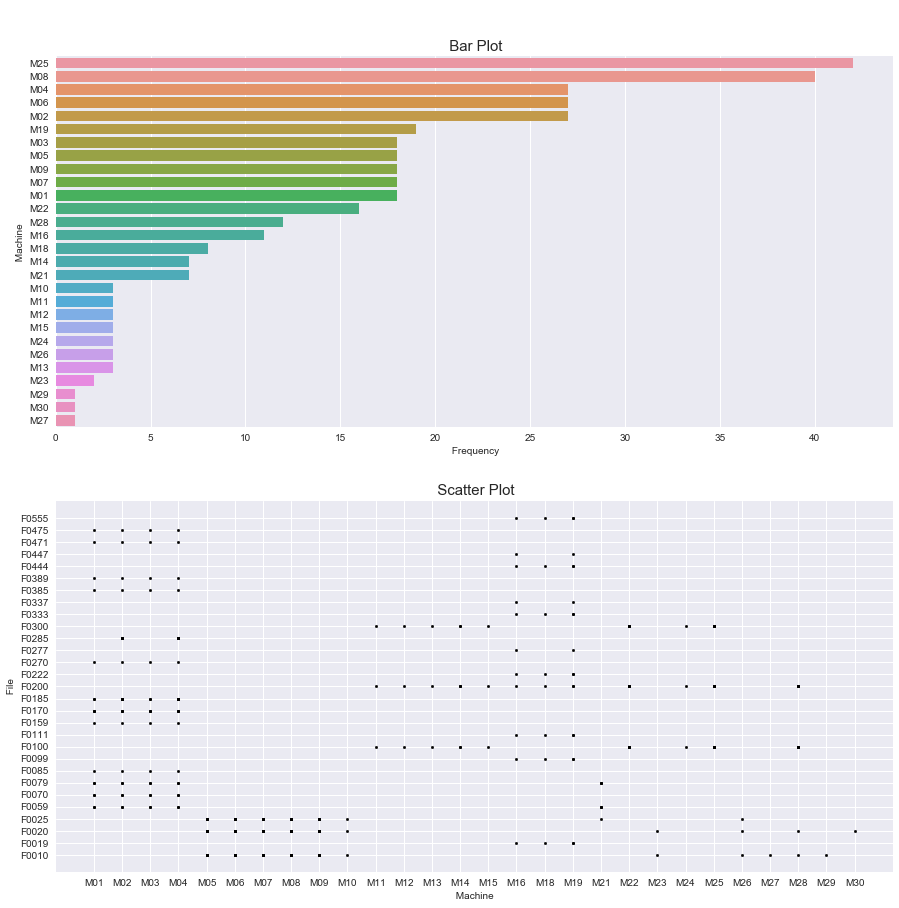

In [187]:
machine = type2["Machine"].value_counts()
print("Unique Files :", machine.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(machine.values, machine.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['Machine'].values
f2 = type2['File'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Machine ", fontsize = 10)
ax[1].set_xlabel(" Machine ", fontsize = 10)
ax[1].set_ylabel(" File ", fontsize = 10)
plt.show()

Unique dates : 14


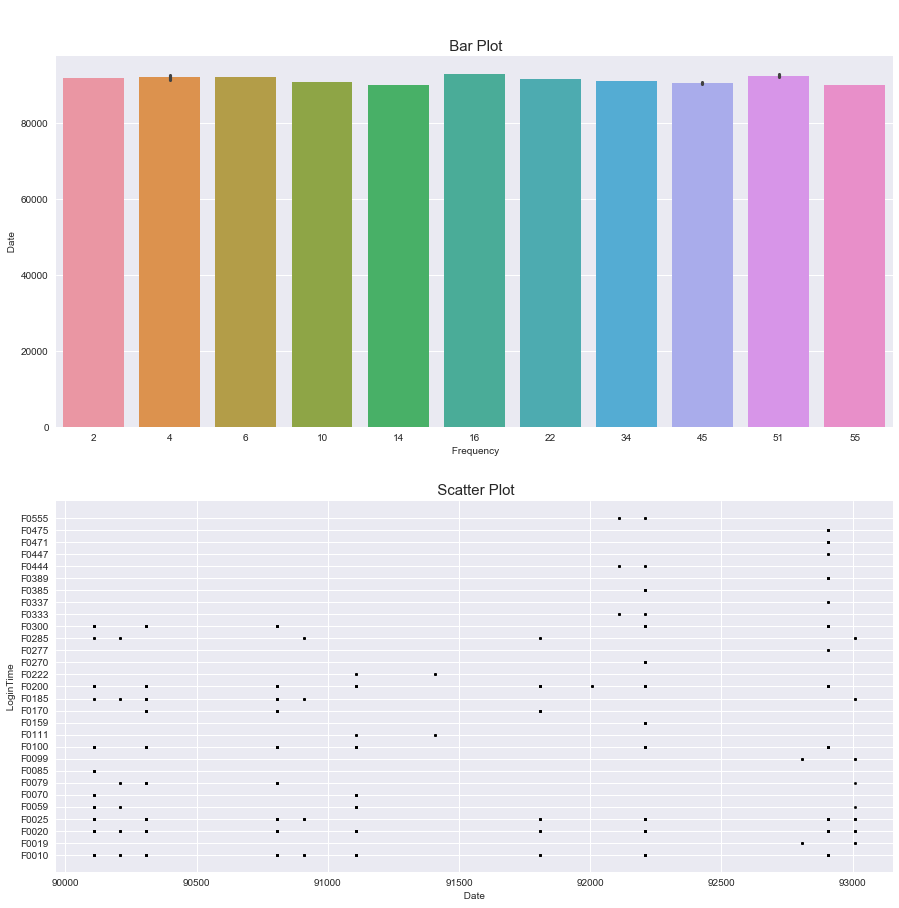

In [188]:
date = type2["Date"].value_counts()
print("Unique dates :", date.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(date.values, date.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['Date'].values
f2 = type2['File'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Date ", fontsize = 10)
ax[1].set_xlabel(" Date ", fontsize = 10)
ax[1].set_ylabel(" LoginTime ", fontsize = 10)
plt.show()

Unique starttime : 28


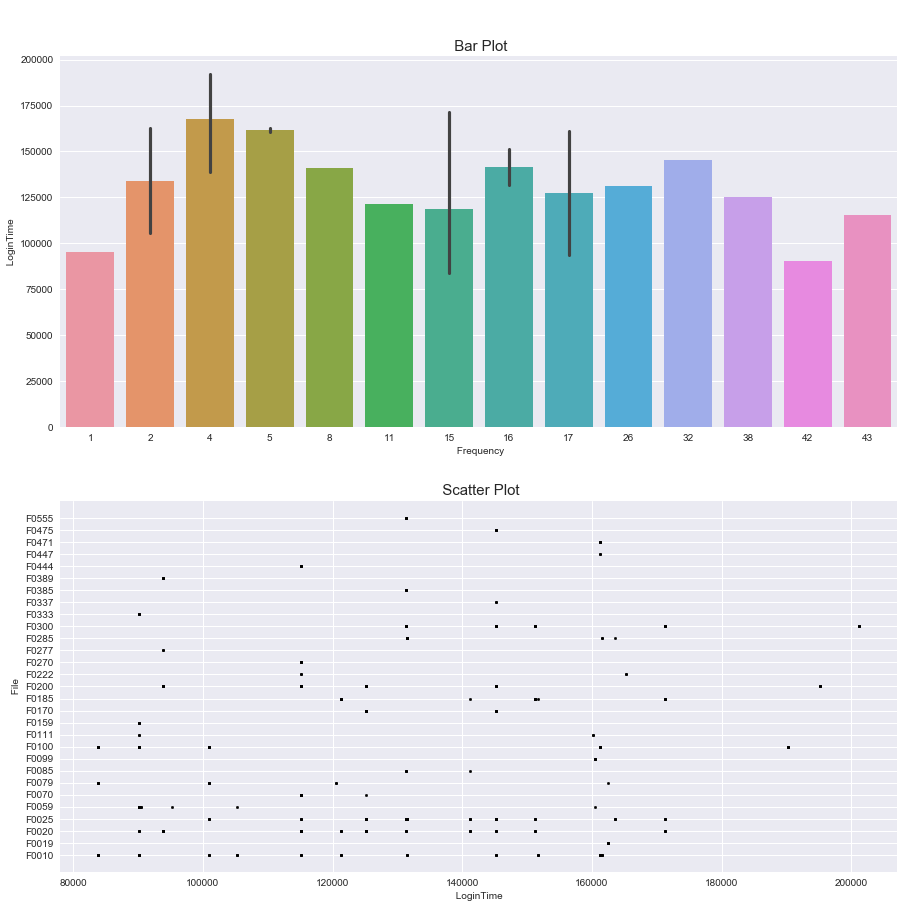

In [189]:
starttime = type2["StartTime"].value_counts()
print("Unique starttime :", starttime.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(starttime.values, starttime.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['StartTime'].values
f2 = type2['File'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" LoginTime ", fontsize = 10)
ax[1].set_xlabel(" LoginTime ", fontsize = 10)
ax[1].set_ylabel(" File ", fontsize = 10)
plt.show()

Unique executiontime : 8


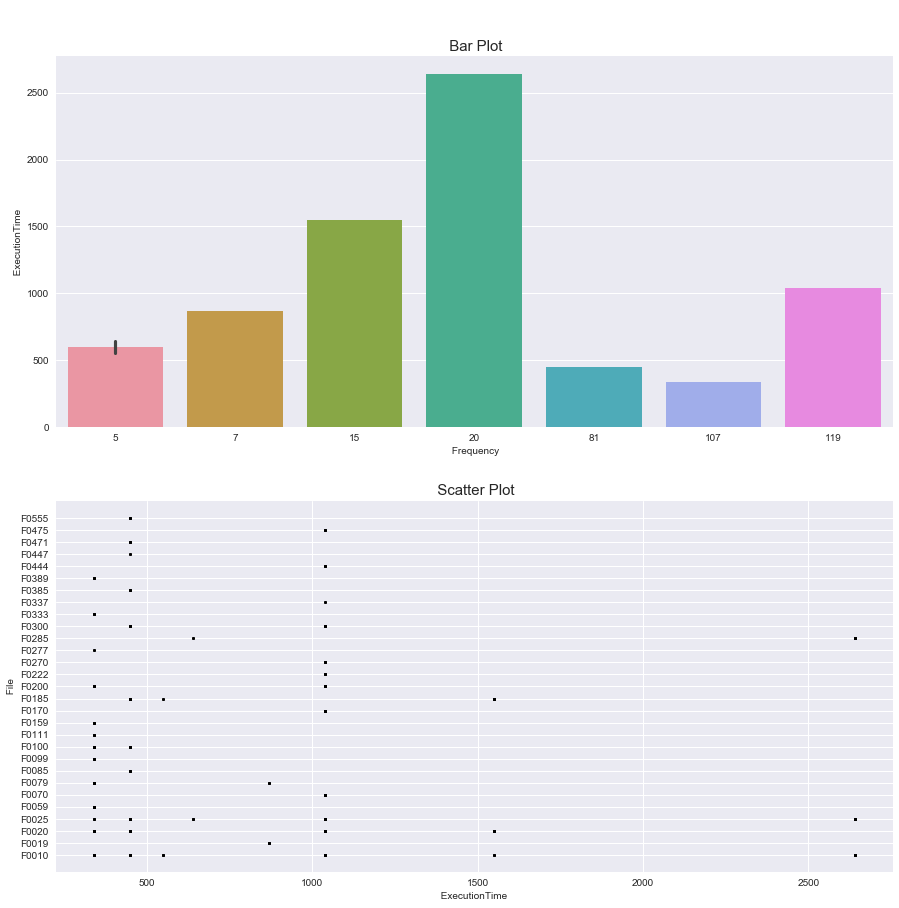

In [190]:
executiontime = type2["ExecutionTime"].value_counts()
print("Unique executiontime :", executiontime.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(executiontime.values, executiontime.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['ExecutionTime'].values
f2 = type2['File'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" ExecutionTime ", fontsize = 10)
ax[1].set_xlabel(" ExecutionTime ", fontsize = 10)
ax[1].set_ylabel(" File ", fontsize = 10)
plt.show()

In [191]:
def toNumeric(data,to):
    if type2[data].dtype == type(object):
        le = preprocessing.LabelEncoder()
        type2[to] = le.fit_transform(type2[data].astype(str))   
toNumeric('File','FileNum')
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


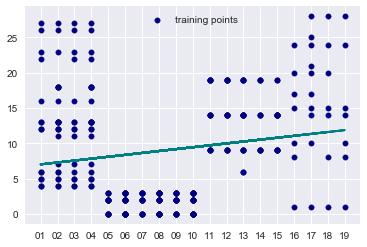

In [192]:
X_train, x_test, Y_train, y_test = train_test_split(
type2['UserNum'], type2['FileNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

In [193]:
r_data= type2[['UserNum','MachineNum','Date']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['FileNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

42.02074772677767

In [194]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


In [195]:
def toNumeric(data,to):
    if type2[data].dtype == type(object):
        le = preprocessing.LabelEncoder()
        type2[to] = le.fit_transform(type2[data].astype(str))   
toNumeric('Status','StatusNum')
toNumeric('Printer','PrinterNum')
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


In [196]:
r_data= type2[['UserNum','MachineNum','Date','PagesPrinted','ProgramNum']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['FileNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

38.925095191029634

In [197]:
r_data= type2[['UserNum','MachineNum','Date','PagesPrinted','ProgramNum','StatusNum','PrinterNum']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['FileNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

34.98418164678408

# Printer Usage Pattern

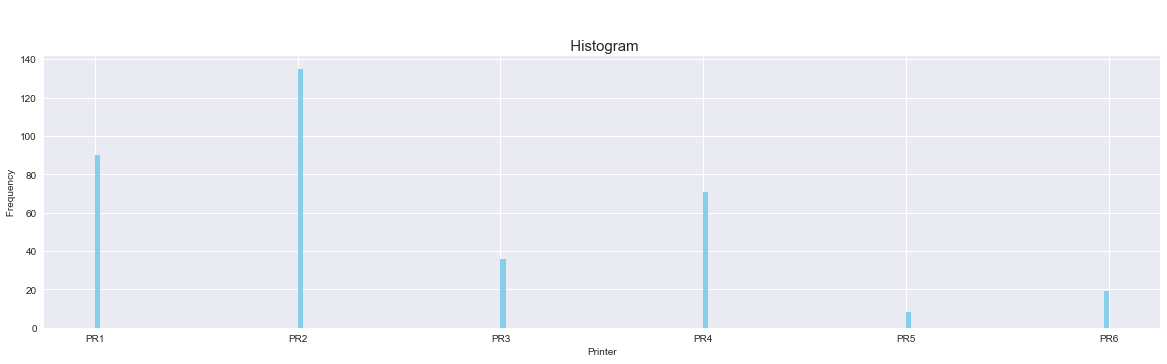

In [221]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type2.Printer, bins = 200, range = [min(type2.Printer), max(type2.Printer)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("Printer", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

In [222]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


Unique users : 19


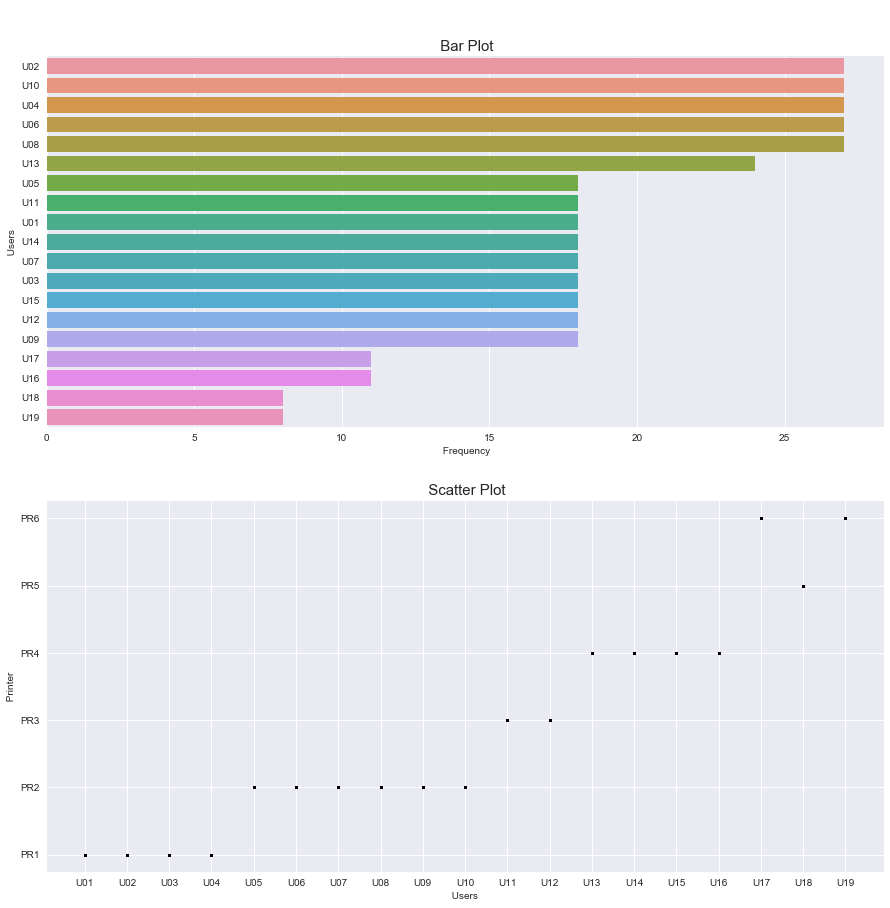

In [114]:
user = type2["User"].value_counts()
print("Unique users :", user.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(user.values, user.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['User'].values
f2 = type2['Printer'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Users ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Printer ", fontsize = 10)
plt.show()

Unique pagesprinted : 11


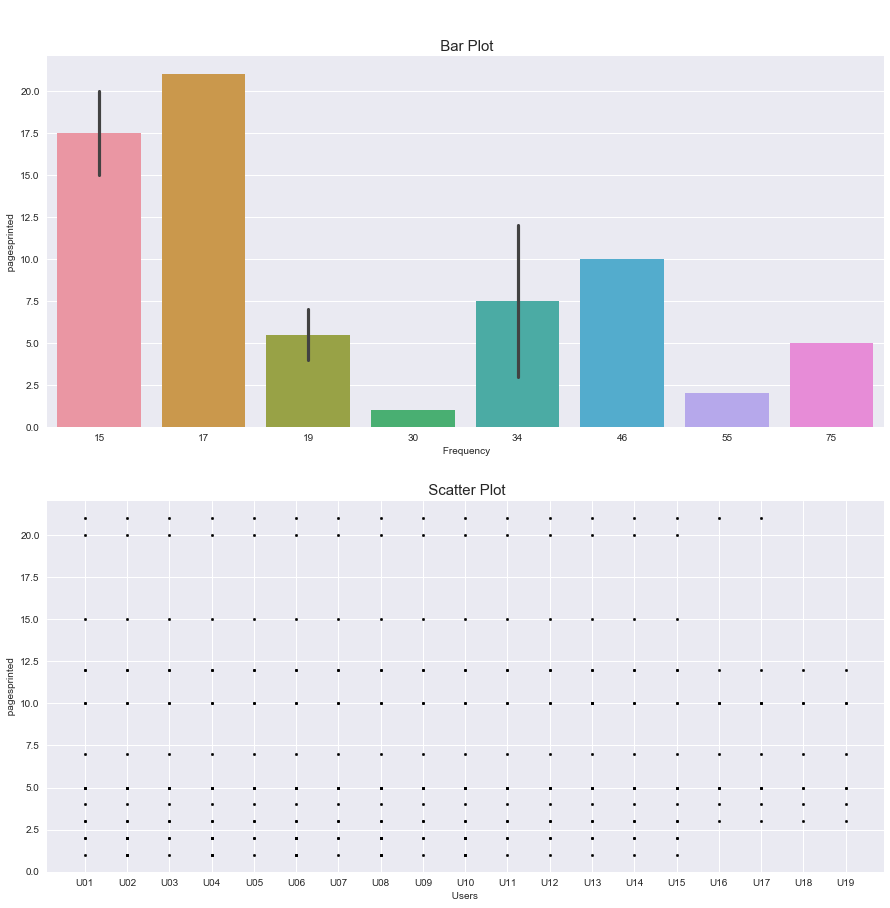

In [251]:
pagesprinted = type2["PagesPrinted"].value_counts()
print("Unique pagesprinted :", pagesprinted.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(pagesprinted.values, pagesprinted.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['User'].values
f2 = type2['PagesPrinted'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" pagesprinted ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" pagesprinted ", fontsize = 10)
plt.show()

Unique Machines : 28


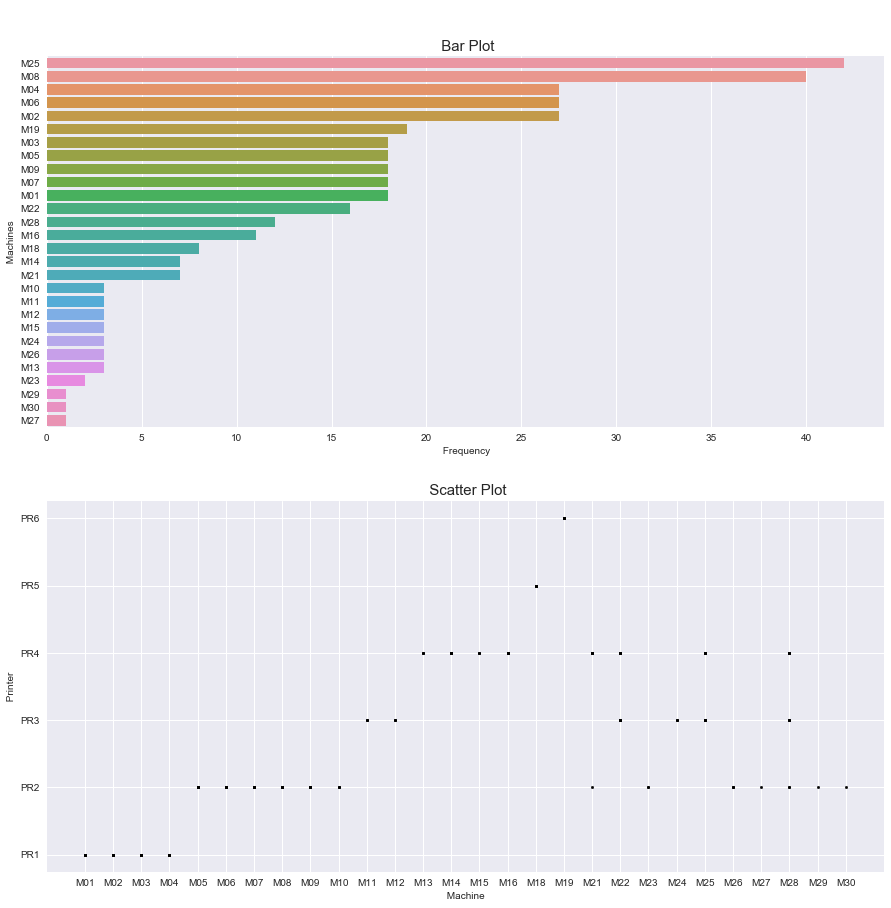

In [115]:
machine = type2["Machine"].value_counts()
print("Unique Machines :", machine.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(machine.values, machine.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['Machine'].values
f2 = type2['Printer'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Machines ", fontsize = 10)
ax[1].set_xlabel(" Machine ", fontsize = 10)
ax[1].set_ylabel(" Printer ", fontsize = 10)
plt.show()

Unique Pages : 11


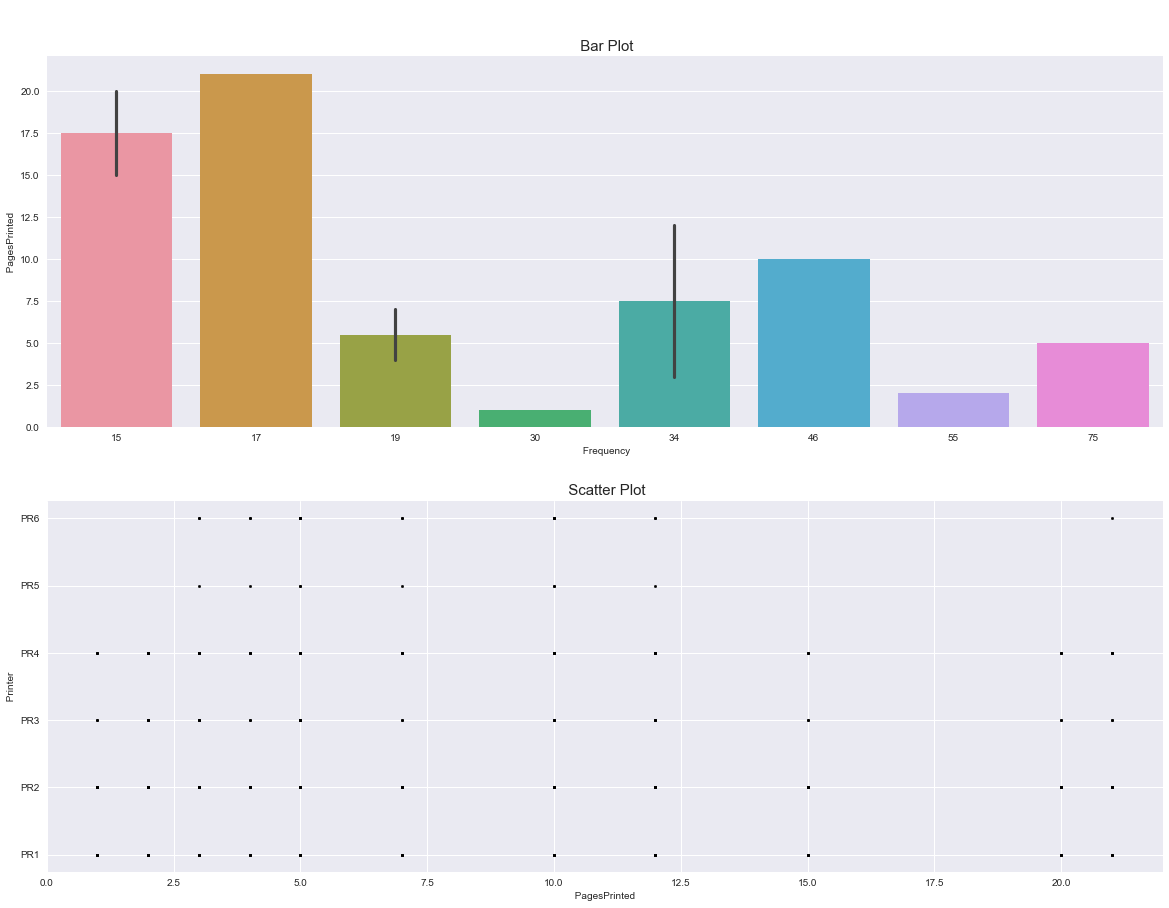

In [116]:
pages = type2["PagesPrinted"].value_counts()
print("Unique Pages :", pages.size)
fig, ax = plt.subplots(2, 1, figsize = (20, 15))
sns.barplot(pages.values, pages.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['PagesPrinted'].values
f2 = type2['Printer'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" PagesPrinted ", fontsize = 10)
ax[1].set_xlabel(" PagesPrinted ", fontsize = 10)
ax[1].set_ylabel(" Printer ", fontsize = 10)
plt.show()

Unique files : 29


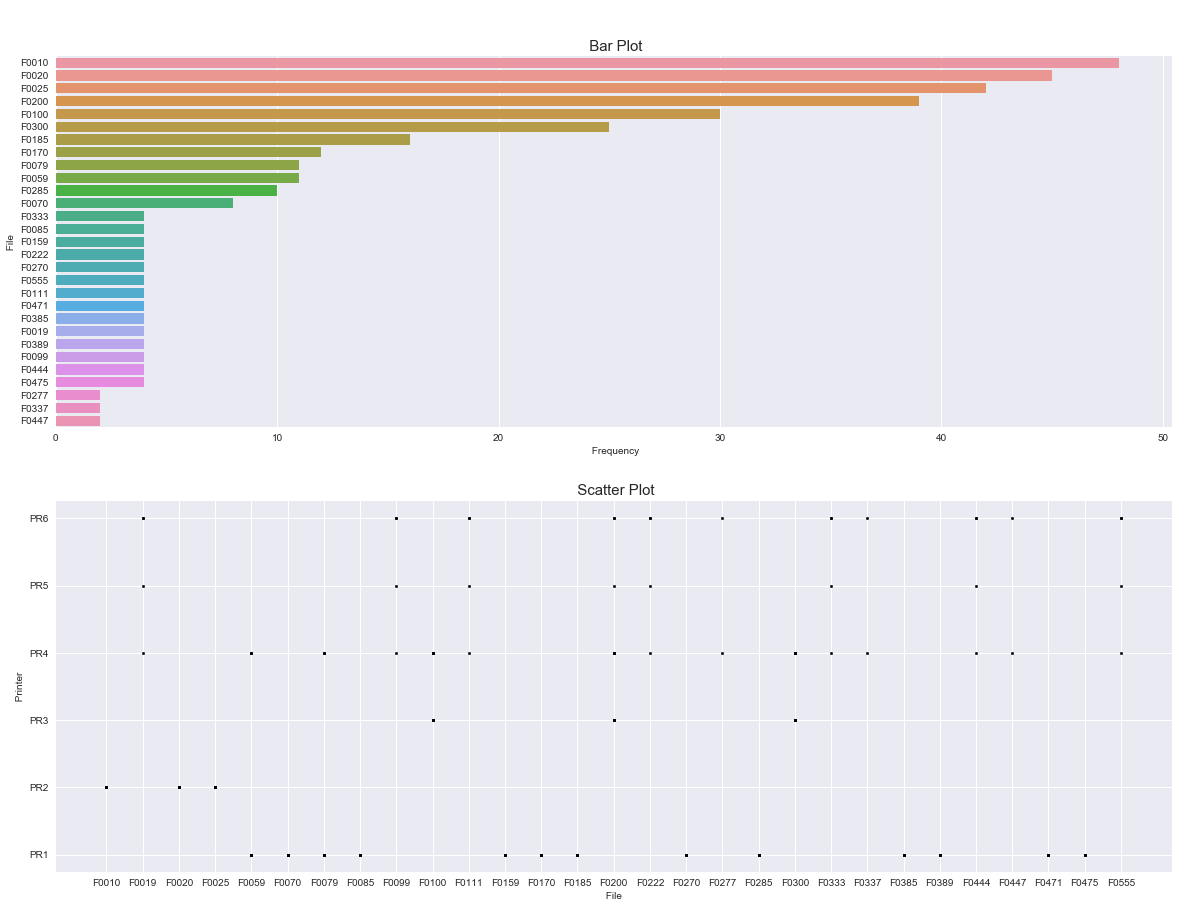

In [301]:
files = type2["File"].value_counts()
print("Unique files :", files.size)
fig, ax = plt.subplots(2, 1, figsize = (20, 15))
sns.barplot(files.values, files.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type2['File'].values
f2 = type2['Printer'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" File ", fontsize = 10)
ax[1].set_xlabel(" File ", fontsize = 10)
ax[1].set_ylabel(" Printer ", fontsize = 10)
plt.show()

In [249]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


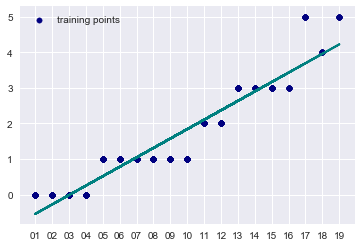

In [199]:
X_train, x_test, Y_train, y_test = train_test_split(
type2['UserNum'], type2['PrinterNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

In [200]:
r_data= type2[['UserNum','MachineNum','Date']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['PrinterNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

0.1718518358982829

In [201]:
r_data= type2[['UserNum','MachineNum','Date','PagesPrinted','ProgramNum','StatusNum','FileNum']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type2['PrinterNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

0.16372843086445305

# Email Pattern

In [202]:
type3.head()

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
0,3,U01,M01,90108,120656,E1,jones@pqr.com,S,209003,1,1,01,01
1,3,U02,M02,90108,120656,E1,jones@pqr.com,S,209003,1,1,02,02
2,3,U03,M03,90108,120656,E1,jones@pqr.com,S,209003,1,1,03,03
3,3,U05,M05,90108,120656,E1,jones@pqr.com,S,209003,1,1,05,05
4,3,U07,M07,90108,120656,E1,smith@abc.org,S,209003,1,3,07,07


In [203]:
def toNumeric(data,to):
    if type3[data].dtype == type(object):
        le = preprocessing.LabelEncoder()
        type3[to] = le.fit_transform(type3[data].astype(str))   
toNumeric('EmailAddress','EmailAddressNum')
type3.head()

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
0,3,U01,M01,90108,120656,E1,jones@pqr.com,S,209003,1,1,01,01
1,3,U02,M02,90108,120656,E1,jones@pqr.com,S,209003,1,1,02,02
2,3,U03,M03,90108,120656,E1,jones@pqr.com,S,209003,1,1,03,03
3,3,U05,M05,90108,120656,E1,jones@pqr.com,S,209003,1,1,05,05
4,3,U07,M07,90108,120656,E1,smith@abc.org,S,209003,1,3,07,07


In [224]:
dataMatrixtype3 = type3.as_matrix()

In [225]:
email= dataMatrixtype3[ :,10]
email_original= dataMatrixtype3[ :,6]
name_dict = dict(zip(np.unique(email), np.unique(email_original)))
name_dict

{0: 'bob@xyz.com',
 1: 'jones@pqr.com',
 2: 'mom@icare.com',
 3: 'smith@abc.org',
 4: 'xyz@sai.org'}

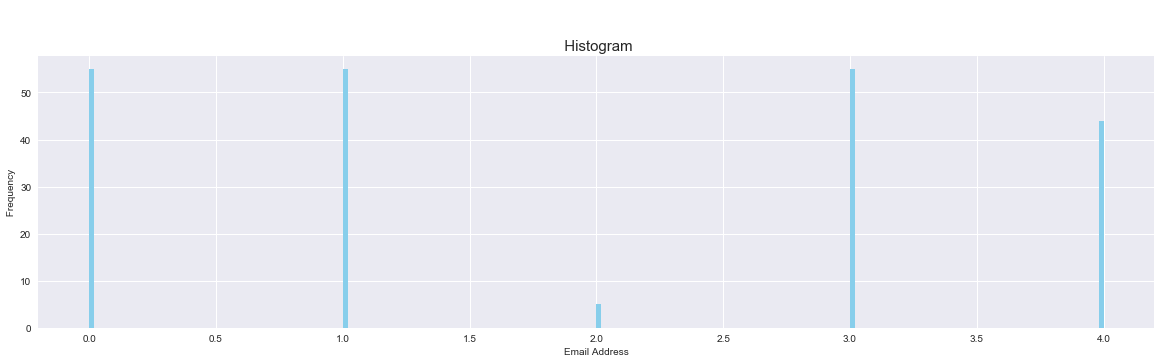

In [204]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type3.EmailAddressNum, bins = 200, range = [min(type3.EmailAddressNum), max(type3.EmailAddressNum)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("Email Address", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

Unique users : 19


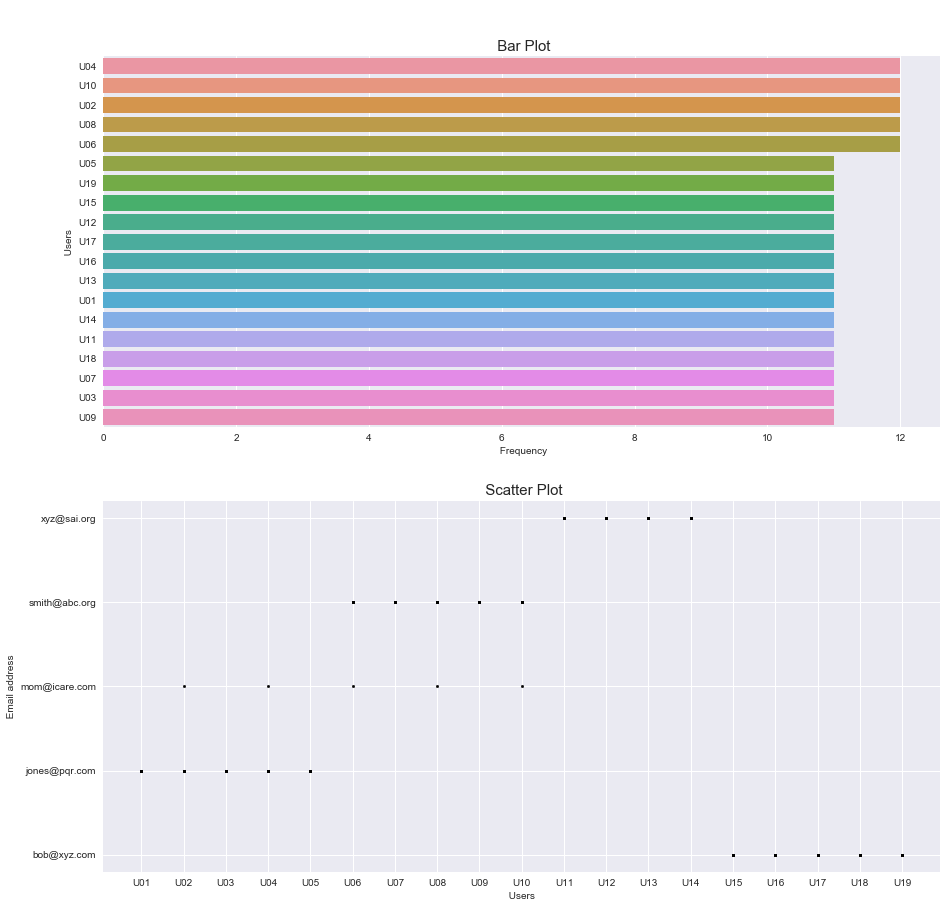

In [124]:
user = type3["User"].value_counts()
print("Unique users :", user.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(user.values, user.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type3['User'].values
f2 = type3['EmailAddress'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Users ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Email address ", fontsize = 10)
plt.show()

Unique Machines : 22


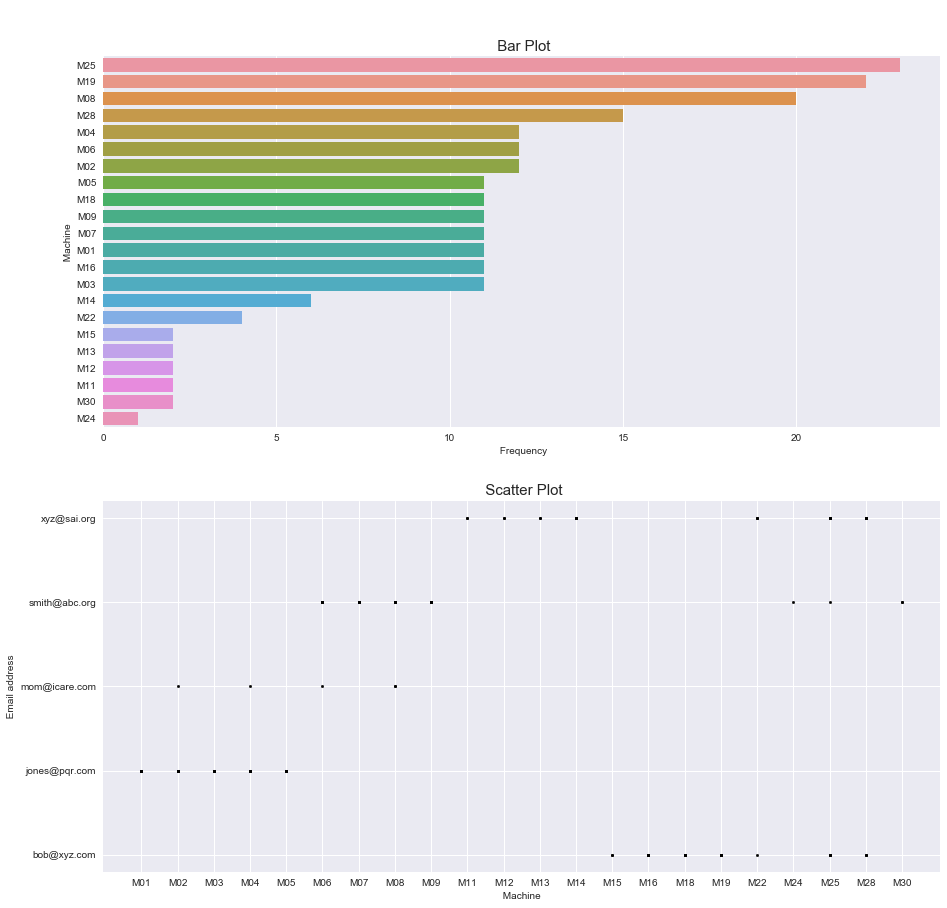

In [125]:
machine = type3["Machine"].value_counts()
print("Unique Machines :", machine.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(machine.values, machine.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type3['Machine'].values
f2 = type3['EmailAddress'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Machine ", fontsize = 10)
ax[1].set_xlabel(" Machine ", fontsize = 10)
ax[1].set_ylabel(" Email address ", fontsize = 10)
plt.show()

Unique emailProgram : 4


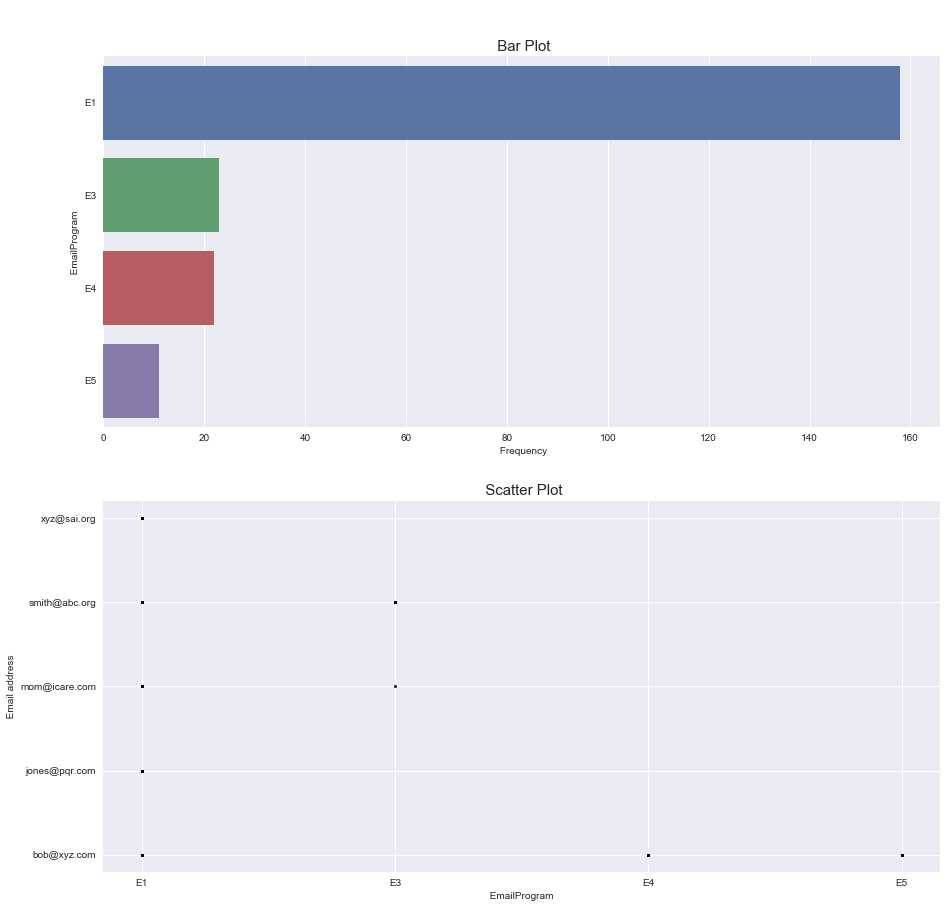

In [126]:
emailProgram = type3["EmailProgram"].value_counts()
print("Unique emailProgram :", emailProgram.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(emailProgram.values, emailProgram.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type3['EmailProgram'].values
f2 = type3['EmailAddress'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" EmailProgram ", fontsize = 10)
ax[1].set_xlabel(" EmailProgram ", fontsize = 10)
ax[1].set_ylabel(" Email address ", fontsize = 10)
plt.show()

Unique status : 2


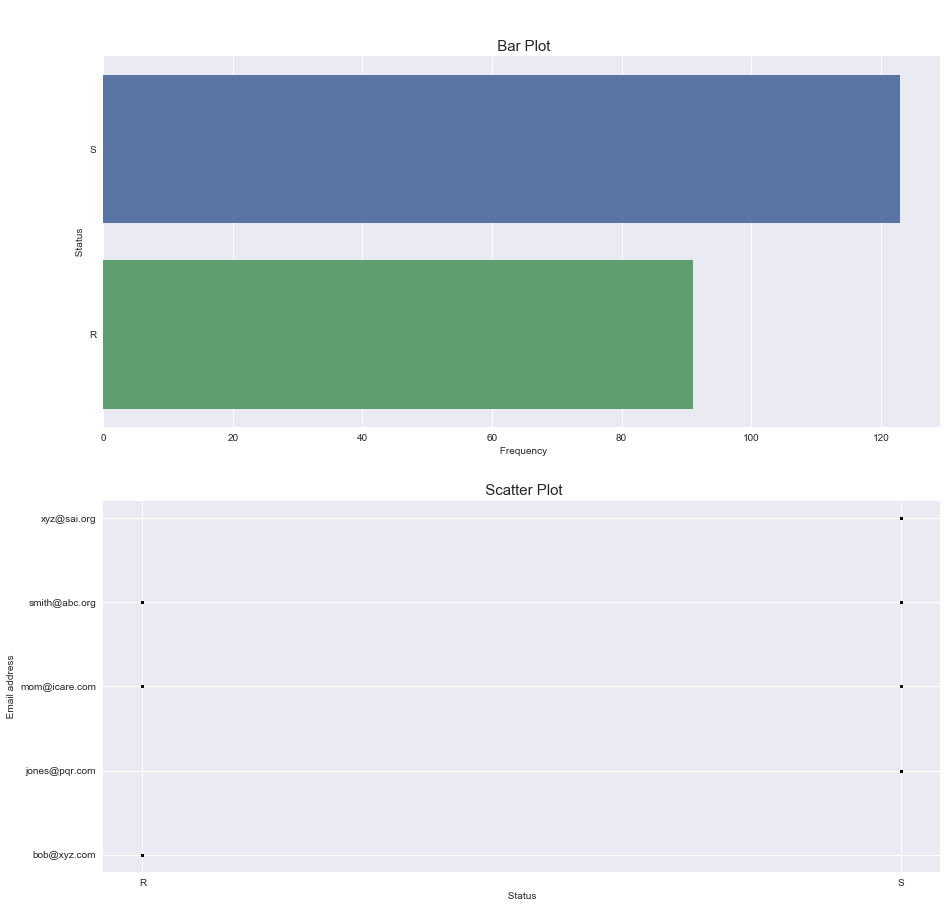

In [127]:
status = type3["Status"].value_counts()
print("Unique status :", status.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(status.values, status.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type3['Status'].values
f2 = type3['EmailAddress'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Status ", fontsize = 10)
ax[1].set_xlabel(" Status ", fontsize = 10)
ax[1].set_ylabel(" Email address ", fontsize = 10)
plt.show()

Unique status : 12


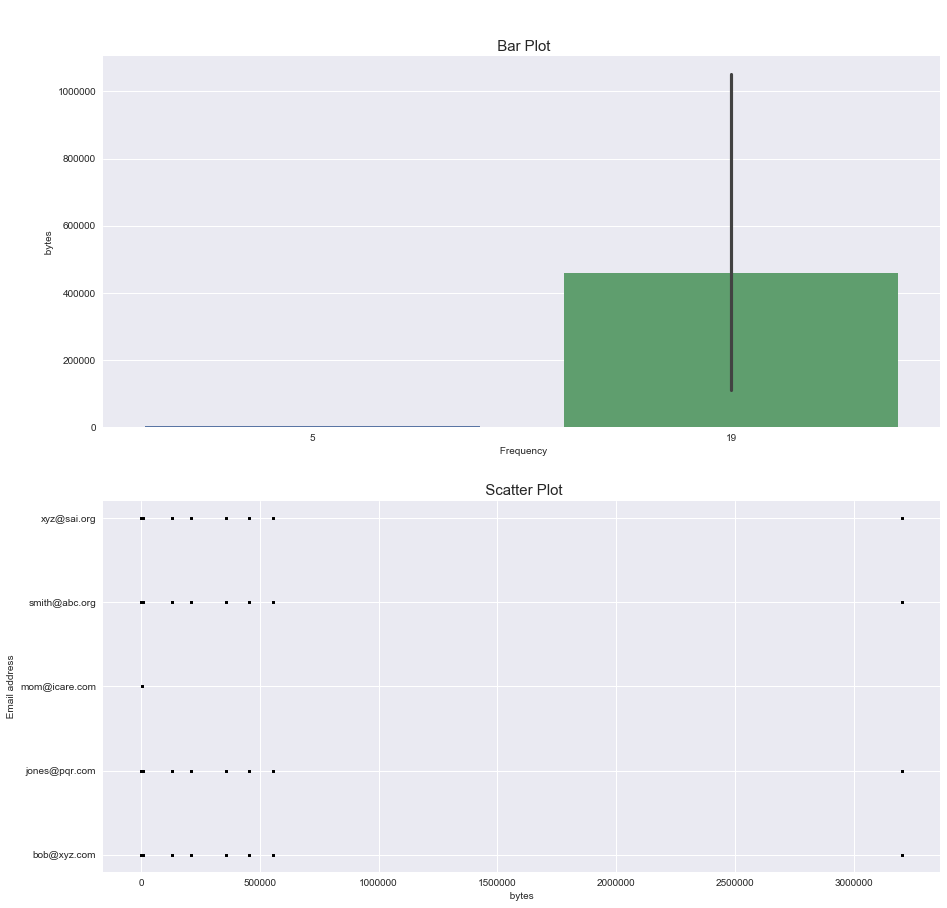

In [128]:
bytes3 = type3["Bytes"].value_counts()
print("Unique status :", bytes3.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(bytes3.values, bytes3.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type3['Bytes'].values
f2 = type3['EmailAddress'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" bytes ", fontsize = 10)
ax[1].set_xlabel(" bytes ", fontsize = 10)
ax[1].set_ylabel(" Email address ", fontsize = 10)
plt.show()

Unique attachments : 3


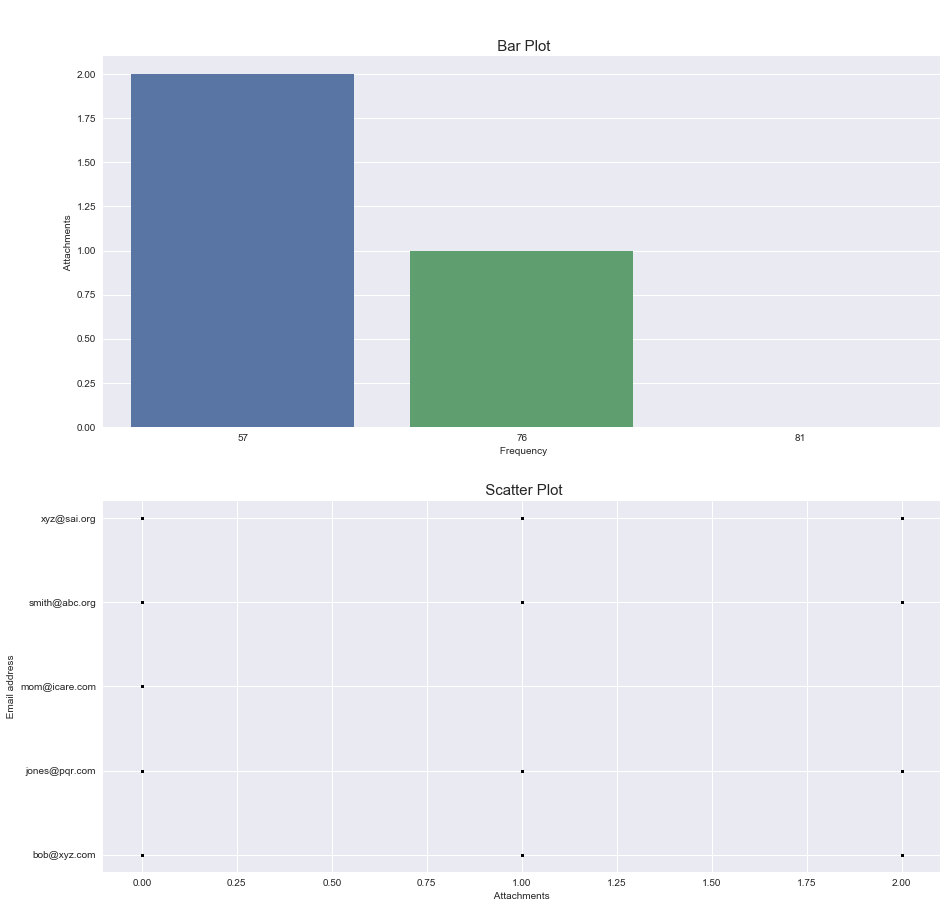

In [129]:
attachments = type3["Attachments"].value_counts()
print("Unique attachments :", attachments.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 15))
sns.barplot(attachments.values, attachments.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type3['Attachments'].values
f2 = type3['EmailAddress'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" Frequency", fontsize = 10)
ax[0].set_ylabel(" Attachments ", fontsize = 10)
ax[1].set_xlabel(" Attachments ", fontsize = 10)
ax[1].set_ylabel(" Email address ", fontsize = 10)
plt.show()

Text(0.5,0.98,' Correlations Heat Map for attributes')

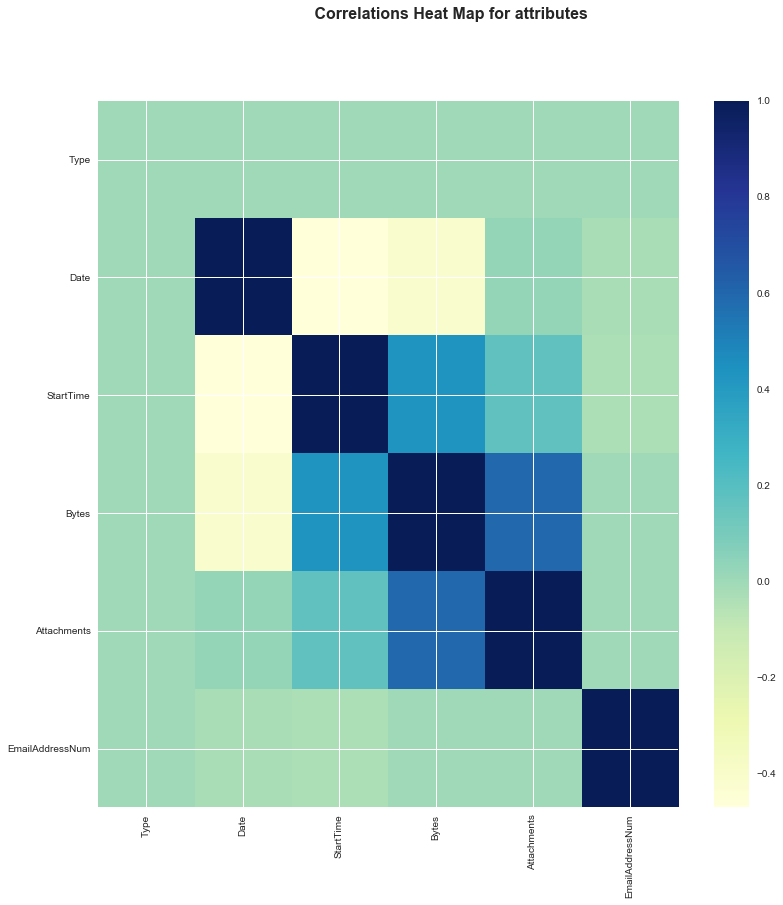

In [130]:
corltn=type3.corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(13, 13))
plt.imshow(corltn, cmap='YlGnBu', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

In [334]:
def email_category(data):
    return type3.loc[type3['EmailAddress'] == data]

In [132]:
def email_status(data):
    return gtrain_cats.loc[gtrain_cats['Status'] == data]

In [335]:
gtrain_cats= email_category('smith@abc.org')
# print(gtrain_cats.shape)
gtrain_cats.head()

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
4,3,U07,M07,90108,120656,E1,smith@abc.org,S,209003,1,3,07,07
5,3,U09,M09,90108,120656,E3,smith@abc.org,S,209003,1,3,09,09
8,3,U06,M06,90108,140656,E1,smith@abc.org,R,209003,1,3,06,06
9,3,U08,M08,90108,140656,E1,smith@abc.org,R,209003,1,3,08,08
10,3,U10,M24,90108,140656,E3,smith@abc.org,R,209003,1,3,10,24


In [336]:
gtrain_status= email_status('S')
# print(gtrain_cats.shape)
gtrain_status

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
4,3,U07,M07,90108,120656,E1,smith@abc.org,S,209003,1,3,07,07
5,3,U09,M09,90108,120656,E3,smith@abc.org,S,209003,1,3,09,09
15,3,U07,M07,90108,150302,E1,smith@abc.org,S,3203045,2,3,07,07
16,3,U09,M09,90108,150302,E3,smith@abc.org,S,3203045,2,3,09,09
49,3,U07,M07,90808,100656,E1,smith@abc.org,S,2090,0,3,07,07
51,3,U09,M09,90808,100656,E3,smith@abc.org,S,2090,0,3,09,09
66,3,U07,M07,90808,160302,E1,smith@abc.org,S,3203,0,3,07,07
68,3,U09,M09,90808,160302,E3,smith@abc.org,S,3203,0,3,09,09
87,3,U07,M07,91808,100656,E1,smith@abc.org,S,132090,1,3,07,07
89,3,U09,M09,91808,100656,E3,smith@abc.org,S,132090,1,3,09,09


In [337]:
gtrain_statusreceived= email_status('R')
# print(gtrain_cats.shape)
gtrain_statusreceived

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
8,3,U06,M06,90108,140656,E1,smith@abc.org,R,209003,1,3,06,06
9,3,U08,M08,90108,140656,E1,smith@abc.org,R,209003,1,3,08,08
10,3,U10,M24,90108,140656,E3,smith@abc.org,R,209003,1,3,10,24
19,3,U06,M06,90108,153302,E1,smith@abc.org,R,3203045,2,3,06,06
20,3,U08,M08,90108,153302,E1,smith@abc.org,R,3203045,2,3,08,08
21,3,U10,M25,90108,153302,E3,smith@abc.org,R,3203045,2,3,10,25
48,3,U06,M06,90808,100656,E1,smith@abc.org,R,2090,0,3,06,06
50,3,U08,M08,90808,100656,E1,smith@abc.org,R,2090,0,3,08,08
52,3,U10,M30,90808,100656,E3,smith@abc.org,R,2090,0,3,10,30
65,3,U06,M06,90808,160302,E1,smith@abc.org,R,3203,0,3,06,06


In [338]:
gtrain_cats= email_category('jones@pqr.com')
# print(gtrain_cats.shape)
gtrain_cats.head()

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
0,3,U01,M01,90108,120656,E1,jones@pqr.com,S,209003,1,1,01,01
1,3,U02,M02,90108,120656,E1,jones@pqr.com,S,209003,1,1,02,02
2,3,U03,M03,90108,120656,E1,jones@pqr.com,S,209003,1,1,03,03
3,3,U05,M05,90108,120656,E1,jones@pqr.com,S,209003,1,1,05,05
7,3,U04,M04,90108,140656,E1,jones@pqr.com,S,209003,1,1,04,04


In [339]:
gtrain_statusreceived= email_status('R')
# print(gtrain_cats.shape)
gtrain_statusreceived

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum


In [340]:
gtrain_statusreceived= email_status('S')
# print(gtrain_cats.shape)
gtrain_statusreceived

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum,UserNum,MachineNum
0,3,U01,M01,90108,120656,E1,jones@pqr.com,S,209003,1,1,01,01
1,3,U02,M02,90108,120656,E1,jones@pqr.com,S,209003,1,1,02,02
2,3,U03,M03,90108,120656,E1,jones@pqr.com,S,209003,1,1,03,03
3,3,U05,M05,90108,120656,E1,jones@pqr.com,S,209003,1,1,05,05
7,3,U04,M04,90108,140656,E1,jones@pqr.com,S,209003,1,1,04,04
11,3,U01,M01,90108,150302,E1,jones@pqr.com,S,3203045,2,1,01,01
12,3,U02,M02,90108,150302,E1,jones@pqr.com,S,3203045,2,1,02,02
13,3,U03,M03,90108,150302,E1,jones@pqr.com,S,3203045,2,1,03,03
14,3,U05,M05,90108,150302,E1,jones@pqr.com,S,3203045,2,1,05,05
18,3,U04,M04,90108,153302,E1,jones@pqr.com,S,3203045,2,1,04,04


In [135]:
type3.head()

,Type,User,Machine,Date,StartTime,EmailProgram,EmailAddress,Status,Bytes,Attachments,EmailAddressNum
0,3,U01,M01,90108,120656,E1,jones@pqr.com,S,209003,1,1
1,3,U02,M02,90108,120656,E1,jones@pqr.com,S,209003,1,1
2,3,U03,M03,90108,120656,E1,jones@pqr.com,S,209003,1,1
3,3,U05,M05,90108,120656,E1,jones@pqr.com,S,209003,1,1
4,3,U07,M07,90108,120656,E1,smith@abc.org,S,209003,1,3


In [136]:
type3['UserNum']=type3.User.str[1:]

In [137]:
type3['MachineNum']=type3.Machine.str[1:]

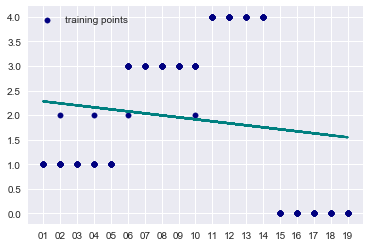

In [138]:
X_train, x_test, Y_train, y_test = train_test_split(
type3['UserNum'], type3['EmailAddressNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

In [139]:
r_data= type3[['UserNum','MachineNum','Date','Bytes','Attachments']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type3['EmailAddressNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

1.5710523165197476

In [140]:
r_data= type3[['UserNum','MachineNum','Date','Bytes','Attachments','StartTime']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type3['EmailAddressNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

1.6061310501077473

# Machine Usage Pattern

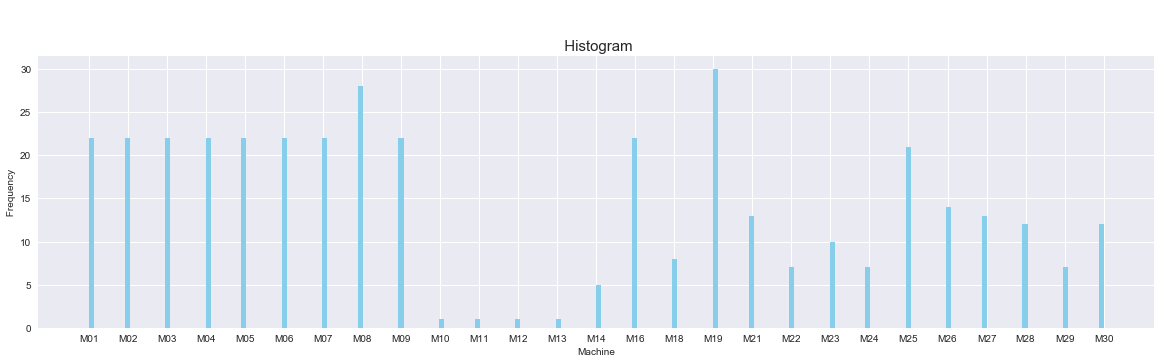

In [205]:
fig, ax = plt.subplots(1, 1, figsize = (20, 5))
ax.hist(type1.Machine, bins = 200, range = [min(type1.Machine), max(type1.Machine)], label = "price",color = "skyblue")
ax.set_title("\n \n  Histogram ", fontsize = 15)
ax.set_xlabel("Machine", fontsize = 10)
ax.set_ylabel(" Frequency ", fontsize = 10)
plt.show()

Unique Machine Names : 27


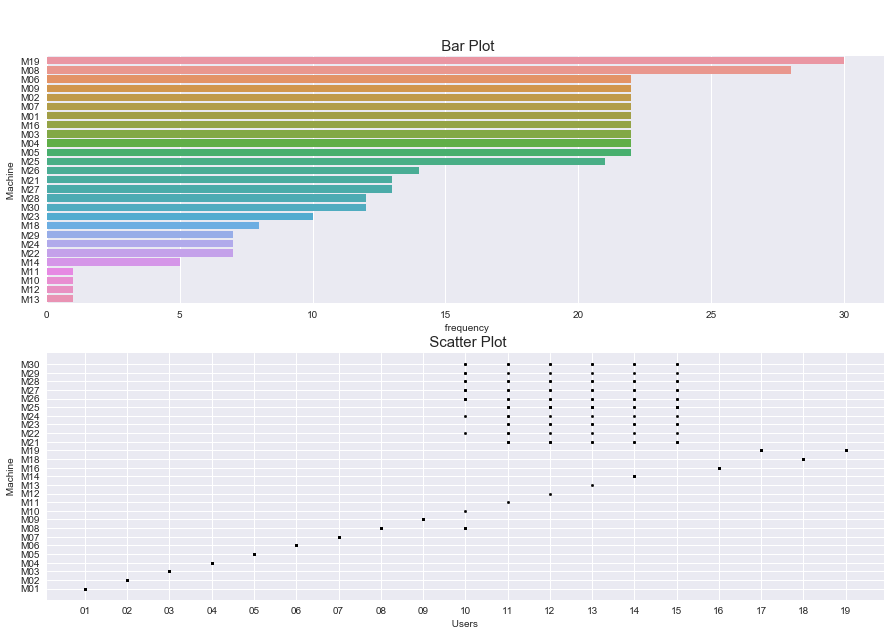

In [206]:
machine = type1["Machine"].value_counts()
print("Unique Machine Names :", machine.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(machine.values, machine.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['UserNum'].values
f2 = type1['Machine'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" Machine ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Machine ", fontsize = 10)
plt.show()

Unique LoginTime : 39


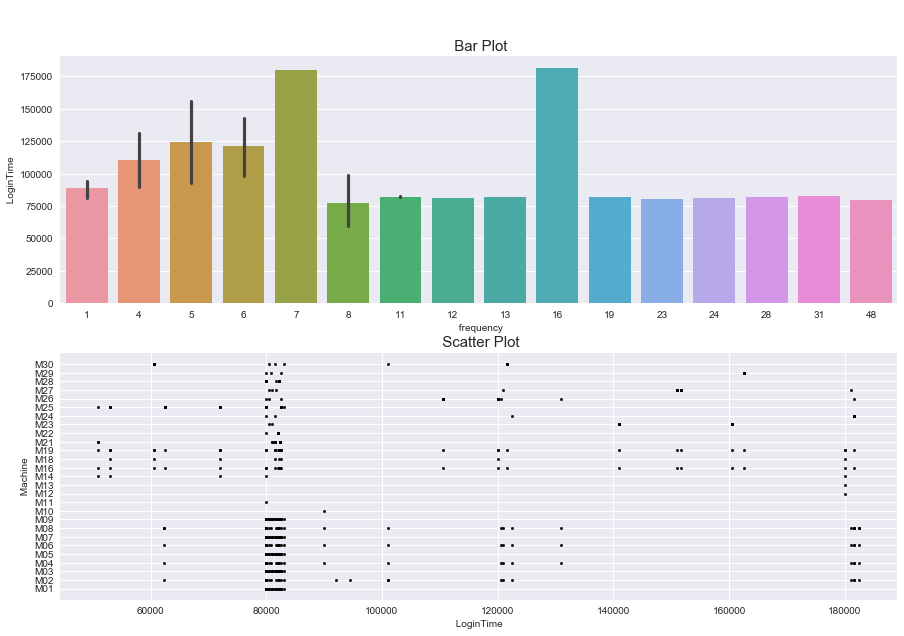

In [226]:
loginTime = type1["LoginTime"].value_counts()
print("Unique LoginTime :", loginTime.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(loginTime.values, loginTime.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['LoginTime'].values
f2 = type1['Machine'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" LoginTime ", fontsize = 10)
ax[1].set_xlabel(" LoginTime ", fontsize = 10)
ax[1].set_ylabel(" Machine ", fontsize = 10)
plt.show()

Unique LogoutTime : 23


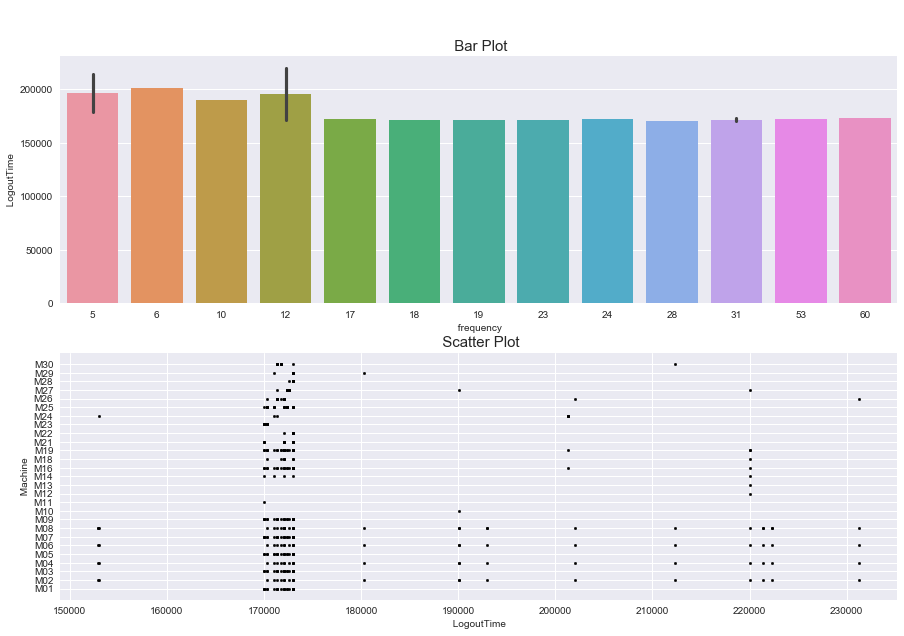

In [227]:
logoutTime = type1["LogoutTime"].value_counts()
print("Unique LogoutTime :", logoutTime.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(logoutTime.values, logoutTime.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['LogoutTime'].values
f2 = type1['Machine'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" LogoutTime ", fontsize = 10)
ax[1].set_xlabel(" LogoutTime ", fontsize = 10)
ax[1].set_ylabel(" Machine ", fontsize = 10)
plt.show()

Unique Date : 29


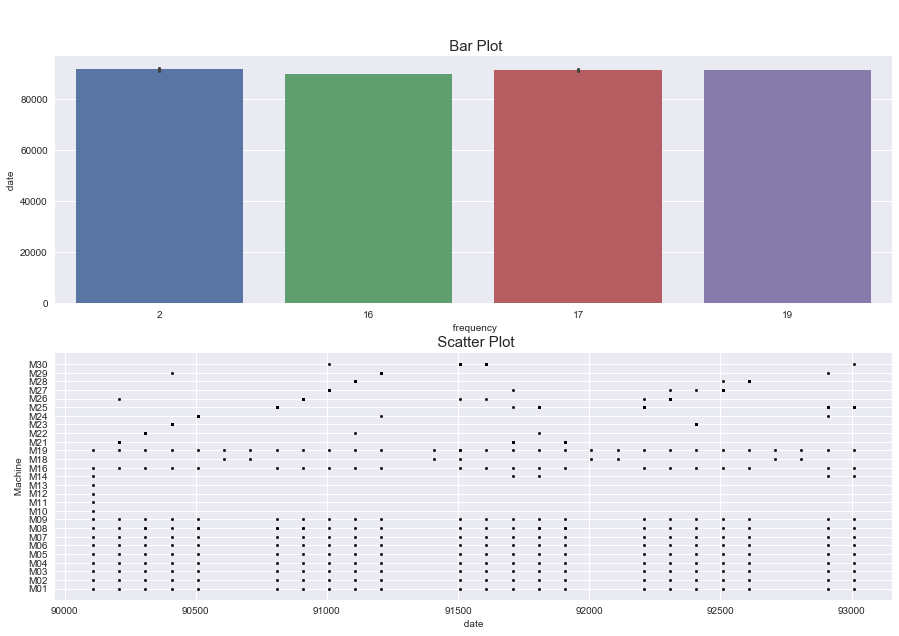

In [208]:
date = type1["Date"].value_counts()
print("Unique Date :", date.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(date.values, date.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['Date'].values
f2 = type1['Machine'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" date ", fontsize = 10)
ax[1].set_xlabel(" date ", fontsize = 10)
ax[1].set_ylabel(" Machine ", fontsize = 10)
plt.show()

Unique CPU : 6


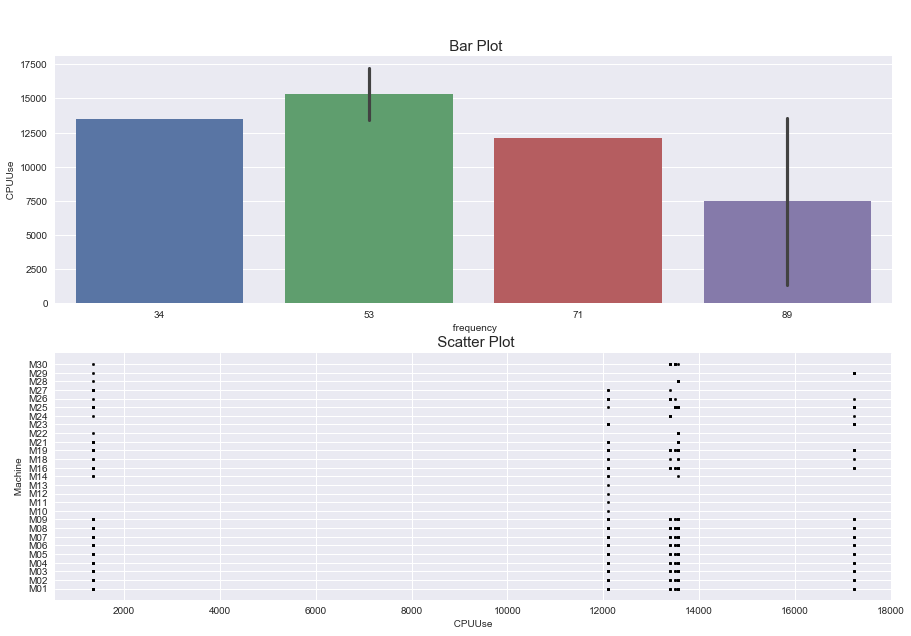

In [302]:
cpuuse = type1["CPUUse"].value_counts()
print("Unique CPU :", cpuuse.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(cpuuse.values, cpuuse.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" Sale Price", fontsize = 10)
f1 = type1['CPUUse'].values
f2 = type1['Machine'].values
X = np.array(list(zip(f1, f2)))
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" CPUUse ", fontsize = 10)
ax[1].set_xlabel(" CPUUse ", fontsize = 10)
ax[1].set_ylabel(" Machine ", fontsize = 10)
plt.show()

In [209]:
type1.head()

,Type,User,Machine,Date,LoginTime,LogoutTime,AvgUserProcess,MaxUserProcess,TotalKeyboadCharacters,CPUUse,UserNum,MachineNum
0,1,U01,M01,90108,80010,170040,22,70,12345,12098,01,01
1,1,U03,M03,90108,82010,172040,22,70,12345,12098,03,03
2,1,U05,M05,90108,82310,171040,22,70,12345,12098,05,05
3,1,U07,M07,90108,80010,170040,22,70,12345,12098,07,07
4,1,U09,M09,90108,81040,170040,22,70,12345,12098,09,09


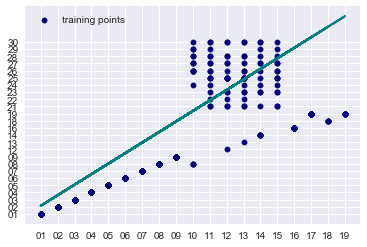

In [212]:
X_train, x_test, Y_train, y_test = train_test_split(
type1['UserNum'], type1['MachineNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
X_train = X_train[:, np.newaxis]
Y_train = Y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
plt.scatter(X_train, Y_train, color='navy', s=30, marker='o', label="training points")
plt.plot(x_test, y_predict, color='teal', linewidth=2)
plt.legend(loc='best')
plt.show()

In [214]:
r_data= type1[['UserNum','Date','LoginTime','LogoutTime','AvgUserProcess','MaxUserProcess']]
X_train, x_test, Y_train, y_test = train_test_split(
r_data, type1['MachineNum'], test_size=0.2, random_state=42)
regr = linear_model.LinearRegression()
Y_train = Y_train[:, np.newaxis]
regr.fit(X_train, Y_train)
y_predict = regr.predict(x_test)
mean_squared_error(y_test,y_predict)

26.1933911647591

In [228]:
type2.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


In [230]:
mercariframe= type2.copy()
mercariframe.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1


In [240]:
def divide_cats(data):
    if( data == "U01"or data=="U02"or data == "U03" or data== "U04"):
        return "File 59-File 2000"
    if( data == "U05"or data=="U06"or data == "U07" or data== "U08"or data == "U09" or data== "U10"):
        return "File 0-File 25"
    if( data == "U11"or data=="U12"or data == "U13" or data== "U14"or data == "U15"):
        return "File 50-File 300"
    if( data == "U16"or data=="U17"or data == "U18" or data== "U19"):
        return "File 10-File 555"
    return "CATOTHER"

In [241]:
mercariframe['file_cats'] =mercariframe.User.map(lambda x : divide_cats(x))

In [360]:


mercariframe.head()

,Type,User,Machine,Date,StartTime,Program,ExecutionTime,File,Status,Printer,PagesPrinted,UserNum,MachineNum,ProgramNum,FileNum,StatusNum,PrinterNum,file_cats
0,2,U01,M01,90108,90201,LP010,340,F0059,R,PR1,10.0,01,01,0,4,0,0,File 59-File 2000
1,2,U03,M03,90108,90201,LP020,340,F0059,R,PR1,10.0,03,03,1,4,0,0,File 59-File 2000
2,2,U05,M05,90108,90201,UP310,340,F0010,RW,PR2,10.0,05,05,18,0,1,1,File 0-File 25
3,2,U07,M07,90108,90201,LP010,340,F0010,RW,PR2,10.0,07,07,0,0,1,1,File 0-File 25
4,2,U09,M09,90108,90201,LP095,340,F0010,RW,PR2,10.0,09,09,8,0,1,1,File 0-File 25


In [252]:
type1.head()

,Type,User,Machine,Date,LoginTime,LogoutTime,AvgUserProcess,MaxUserProcess,TotalKeyboadCharacters,CPUUse,UserNum,MachineNum
0,1,U01,M01,90108,80010,170040,22,70,12345,12098,01,01
1,1,U03,M03,90108,82010,172040,22,70,12345,12098,03,03
2,1,U05,M05,90108,82310,171040,22,70,12345,12098,05,05
3,1,U07,M07,90108,80010,170040,22,70,12345,12098,07,07
4,1,U09,M09,90108,81040,170040,22,70,12345,12098,09,09


In [253]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

Unique User Names : 19


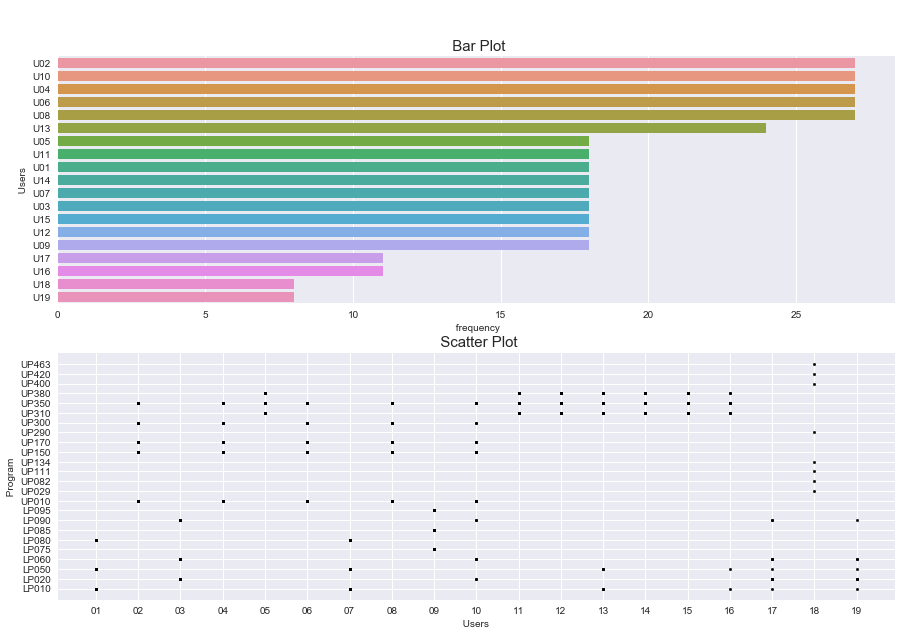

In [70]:
user2 = type2["User"].value_counts()
print("Unique User Names :", user2.size)
fig, ax = plt.subplots(2, 1, figsize = (15, 10))
sns.barplot(user2.values, user2.index,ax = ax[0])
ax[0].set_title("\n \n  Bar Plot ", fontsize = 15)
ax[0].set_xlabel(" User ", fontsize = 10)
f1 = type2['UserNum'].values
f2 = type2['Program'].values
ax[1].set_title("\n \n  Scatter Plot ", fontsize = 15)
ax[1].scatter(f1, f2, c='black', s=7)
ax[0].set_xlabel(" frequency", fontsize = 10)
ax[0].set_ylabel(" Users ", fontsize = 10)
ax[1].set_xlabel(" Users ", fontsize = 10)
ax[1].set_ylabel(" Program ", fontsize = 10)
plt.show()